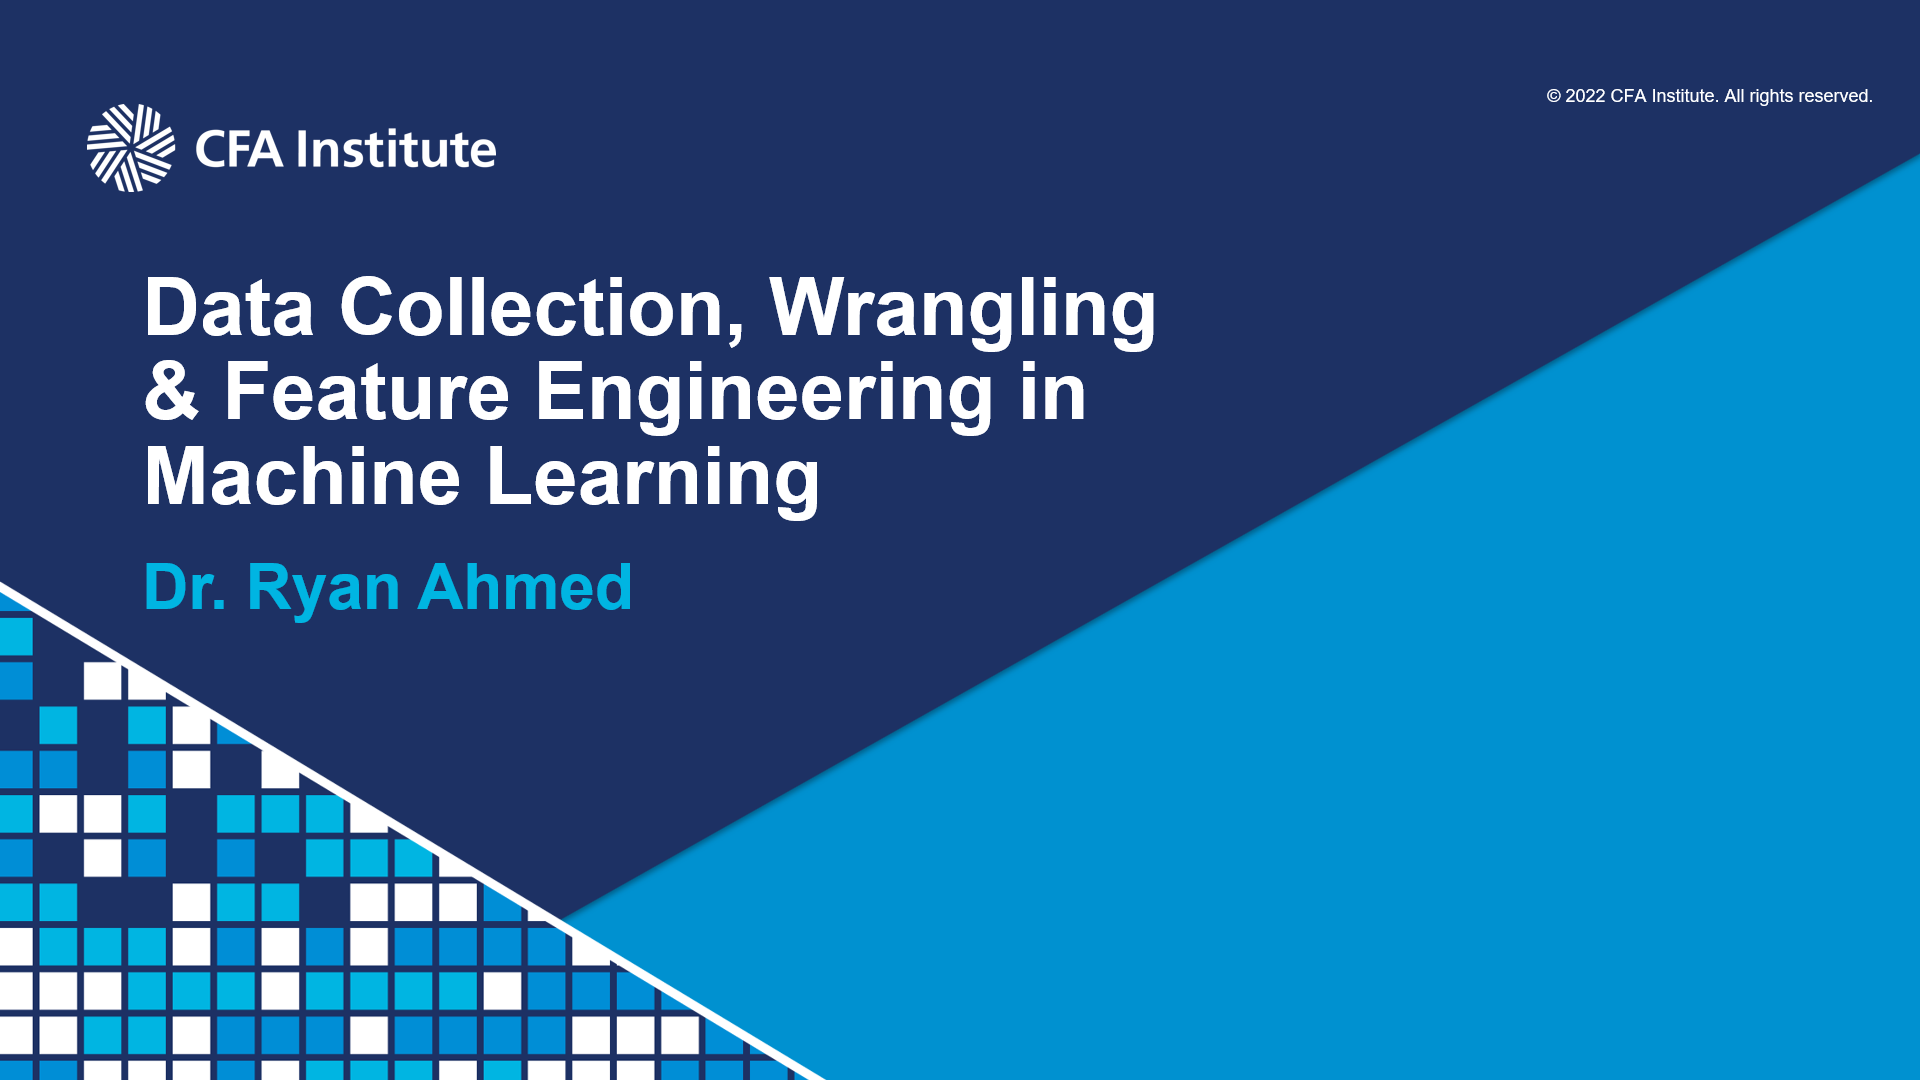

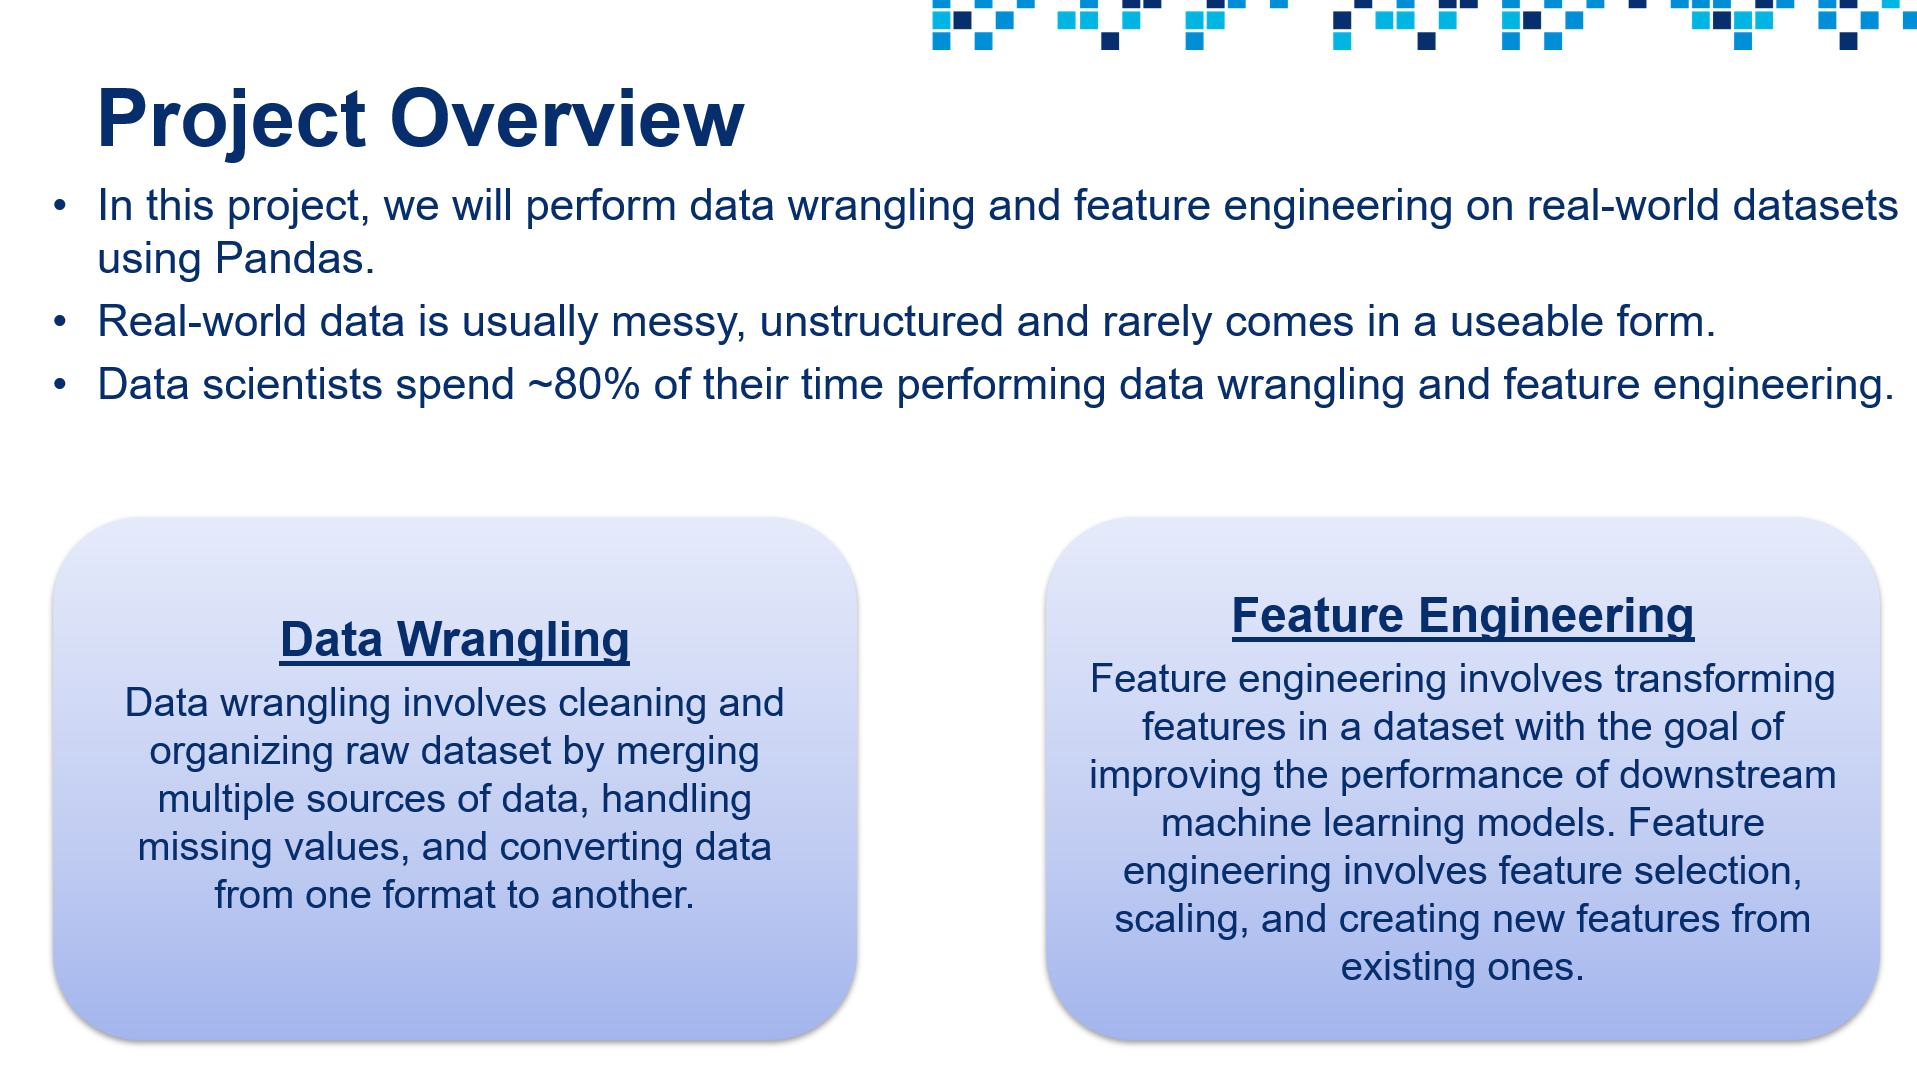

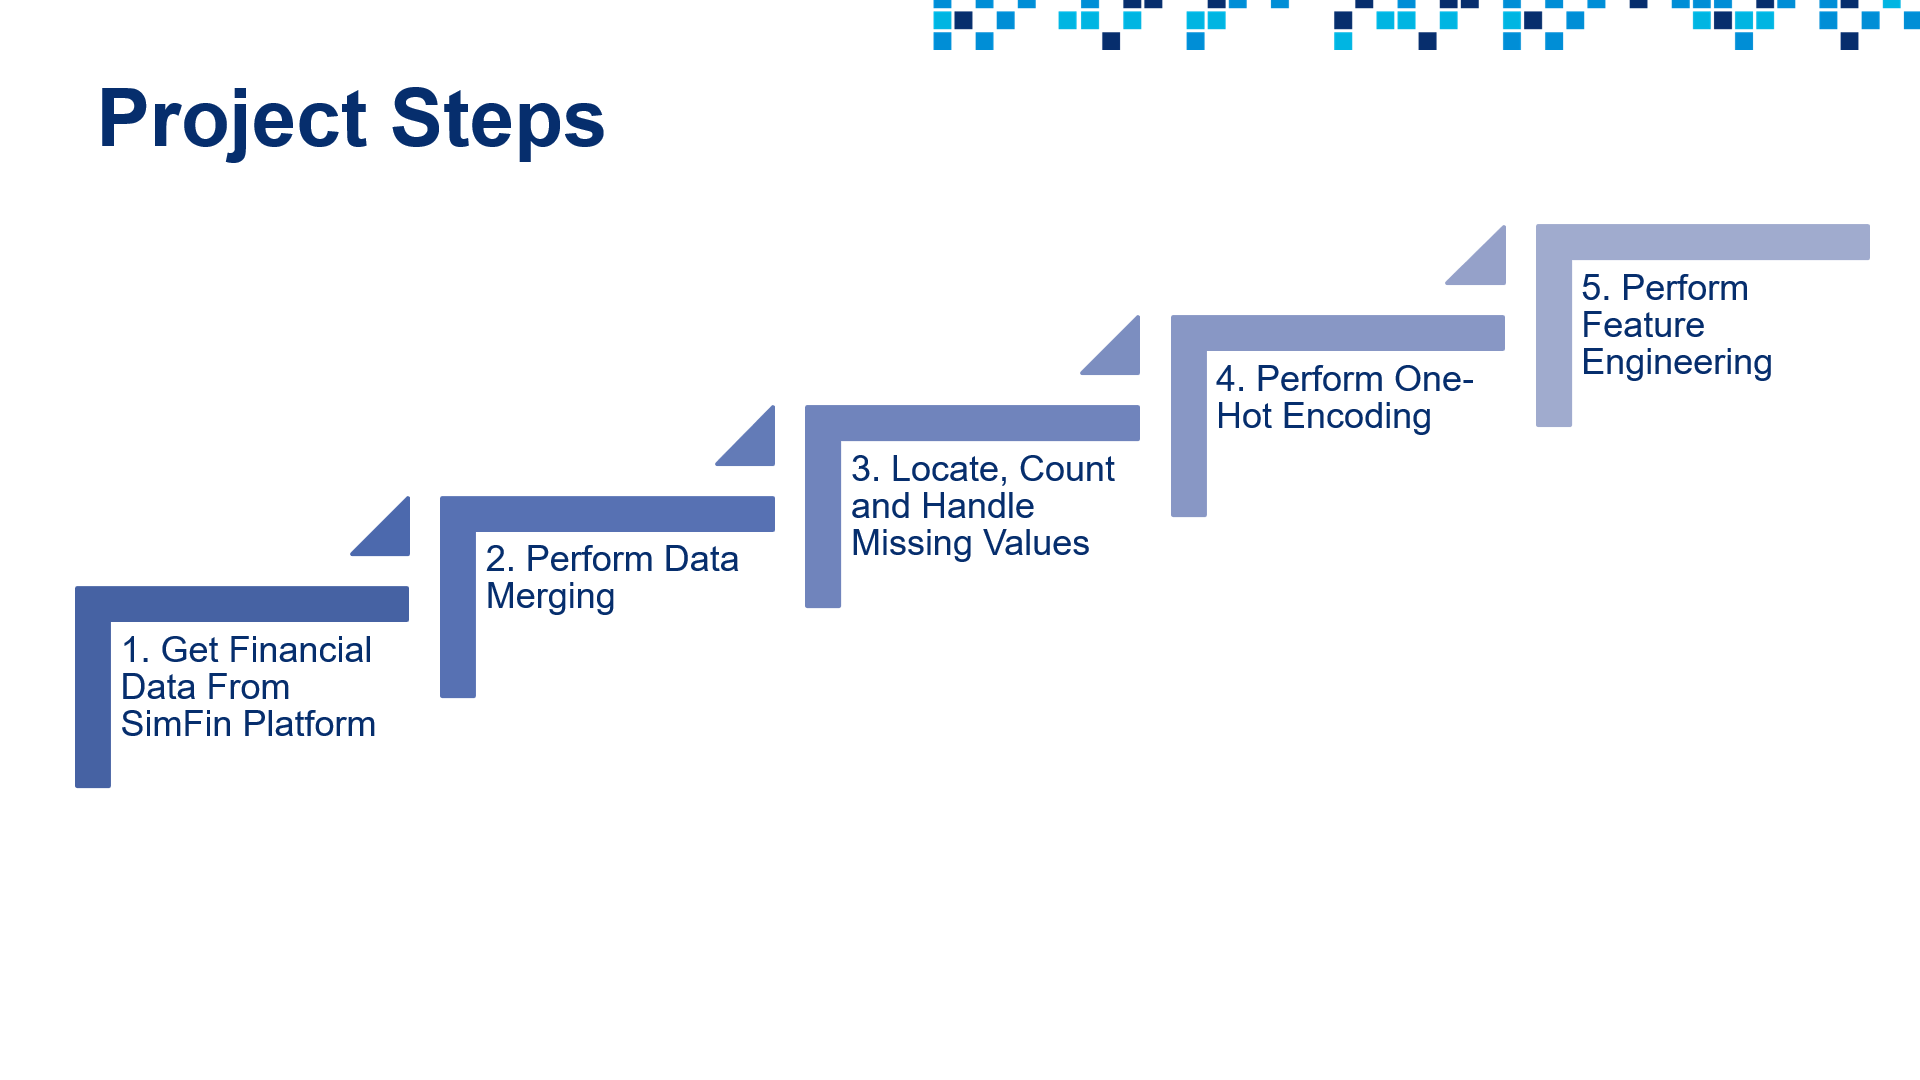

# GET FINANCIAL DATA USING SIMFIN PLATFORM

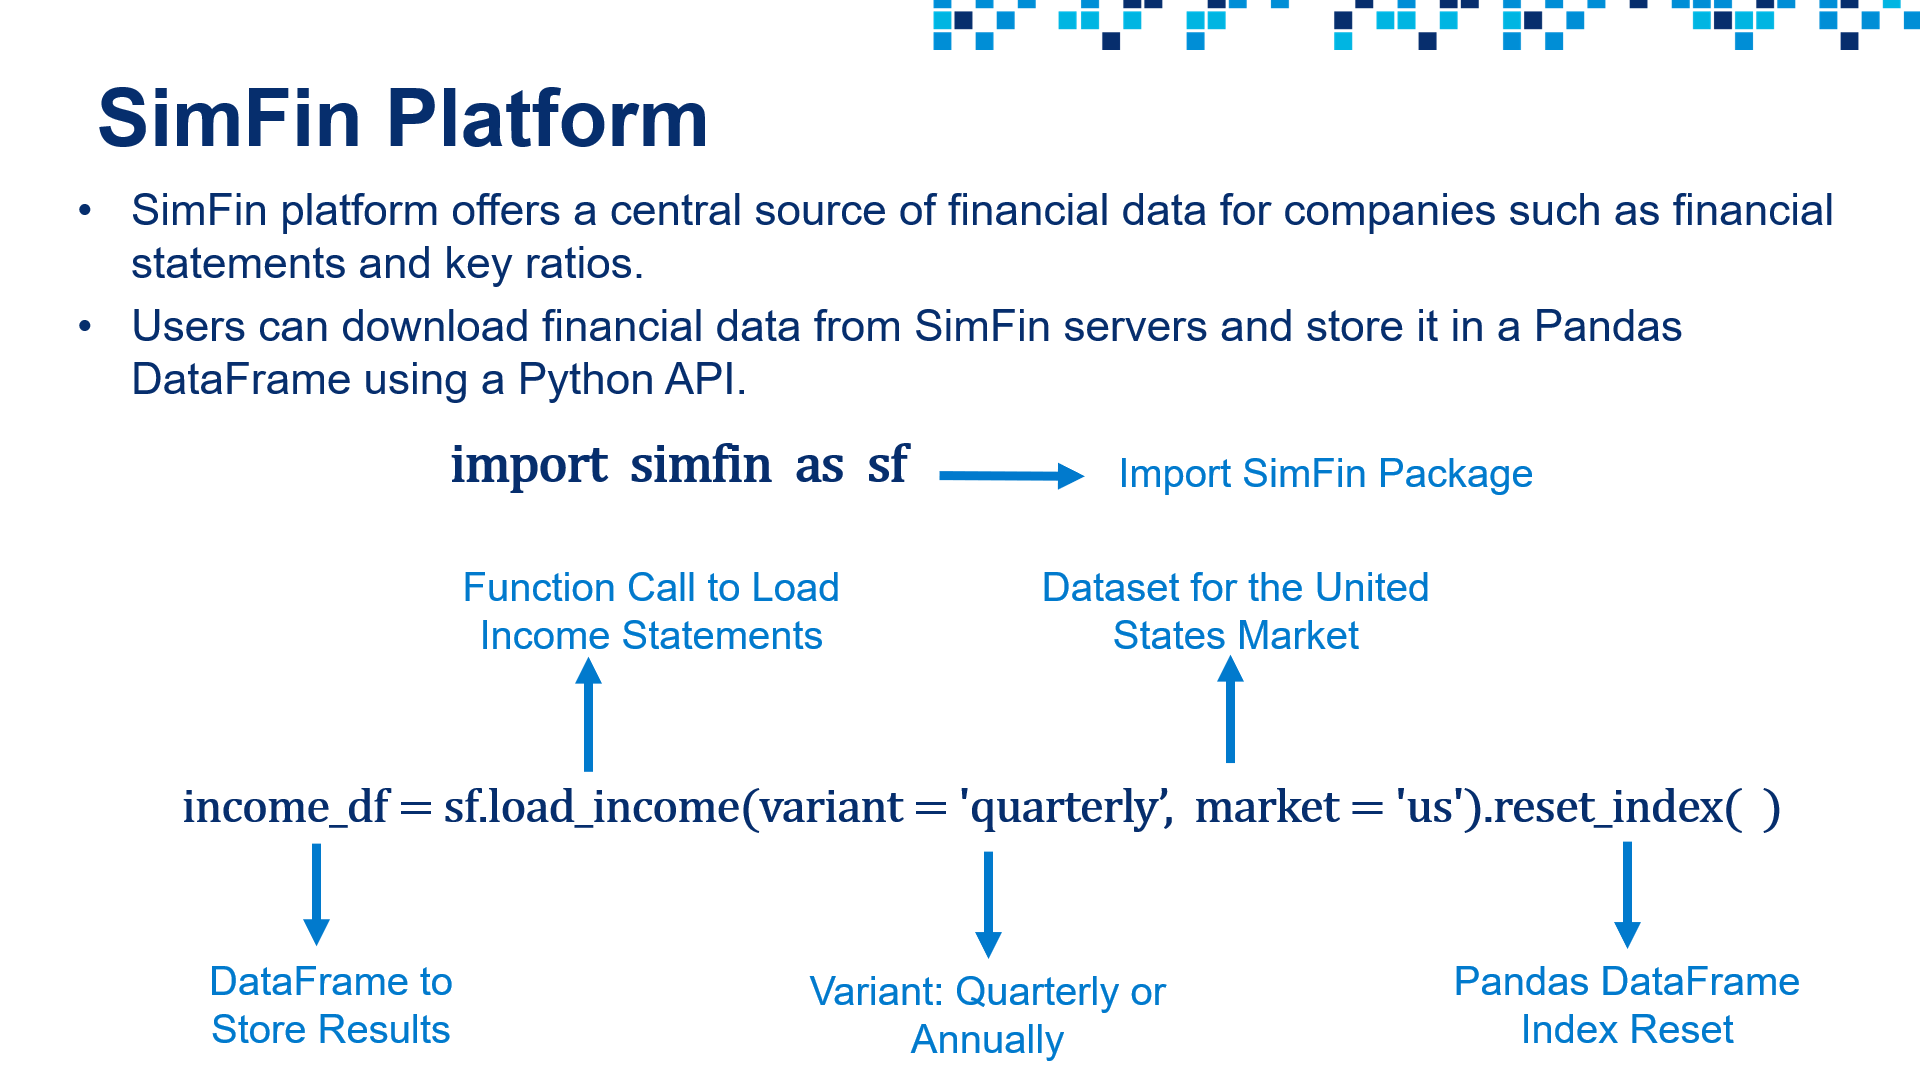

- Link to SimFin Platform: www.simfin.com
- Link to documentation and tutorials:https://github.com/SimFin/simfin-tutorials

In [ ]:
# SimFin is a platform used to obtain free fundamental financial data
# It is used to get financial and stock market data in Python 
# Users can download financial data from SimFin servers and store it in Pandas DataFrames  
# Link to documentation and tutorials: https://github.com/SimFin/simfin-tutorials
# Let's install SimFin library 
!pip install simfin

In [ ]:
# Note that an API key is required to download data from SimFin servers
# A key can be obtained for free by registering on www.simfin.com
# Import SimFin library as sf which is the alias name for SimFin 
import simfin as sf

In [ ]:
# Pandas is a data manipulation and analysis library in Python that uses a data structure known as DataFrame
# A DataFrame is a two-dimensional tabular data structure with labeled rows and columns
# DataFrames are equivalent to Microsoft Excel spreadsheets
# Pandas is superior at automating data processing tasks than Excel and can work with a large amount of data
import pandas as pd

In [ ]:
# Set your API key for downloading data
# You will need to create a free acount and place your own API key here 
# https://simfin.com/data/api
sf.set_api_key('JKxFKoyHNRt3JGVjD6Tp1FGy2LMejBDd')

# Setup a place (local directory) to store the data 
sf.set_data_dir('~/simfin_data/')

In [ ]:
income_df = sf.load_income(variant = 'quarterly', market = 'us')
income_df

In [ ]:
# Let's load quarterly income statements for US companies using SimFin
# Download data from SimFin servers and load it into a Pandas DataFrame
# Note that variant could be 'annual' or 'quarterly'
# The reset_index() is used for index resetting
# This method is used to remove one indexing level since the Pandas DataFrame is multi-indexed 
income_df = sf.load_income(variant = 'quarterly', market = 'us').reset_index()
income_df

In [ ]:
# Let's load quarterly cashflow statements for US companies using SimFin
cashflow_df = sf.load_cashflow(variant = 'quarterly', market = 'us').reset_index()
cashflow_df

In [ ]:
# Let's load quarterly balance sheets for US companies using SimFin
balance_df = sf.load_balance(variant = 'quarterly', market = 'us').reset_index()
balance_df

In [ ]:
# Use the info method to view Pandas DataFrame information for quarterly income statements 
income_df.info()

In [ ]:
# Use the info method to view Pandas DataFrame information for quarterly balance sheets 
balance_df.info()

In [ ]:
# Use the info method to view Pandas DataFrame information for quarterly cashflow statements 
cashflow_df.info()

**PRACTICE OPPORTUNITY:**
- **Load the annual cashflow statements for US companies using SimFin and store them in cashflow_annual_df Pandas DataFrame**
- **What is the memory usage of the cashflow_annual_df Pandas DataFrame?**

# READ FINANCIAL DATA IN CSV FORMAT USING PANDAS 

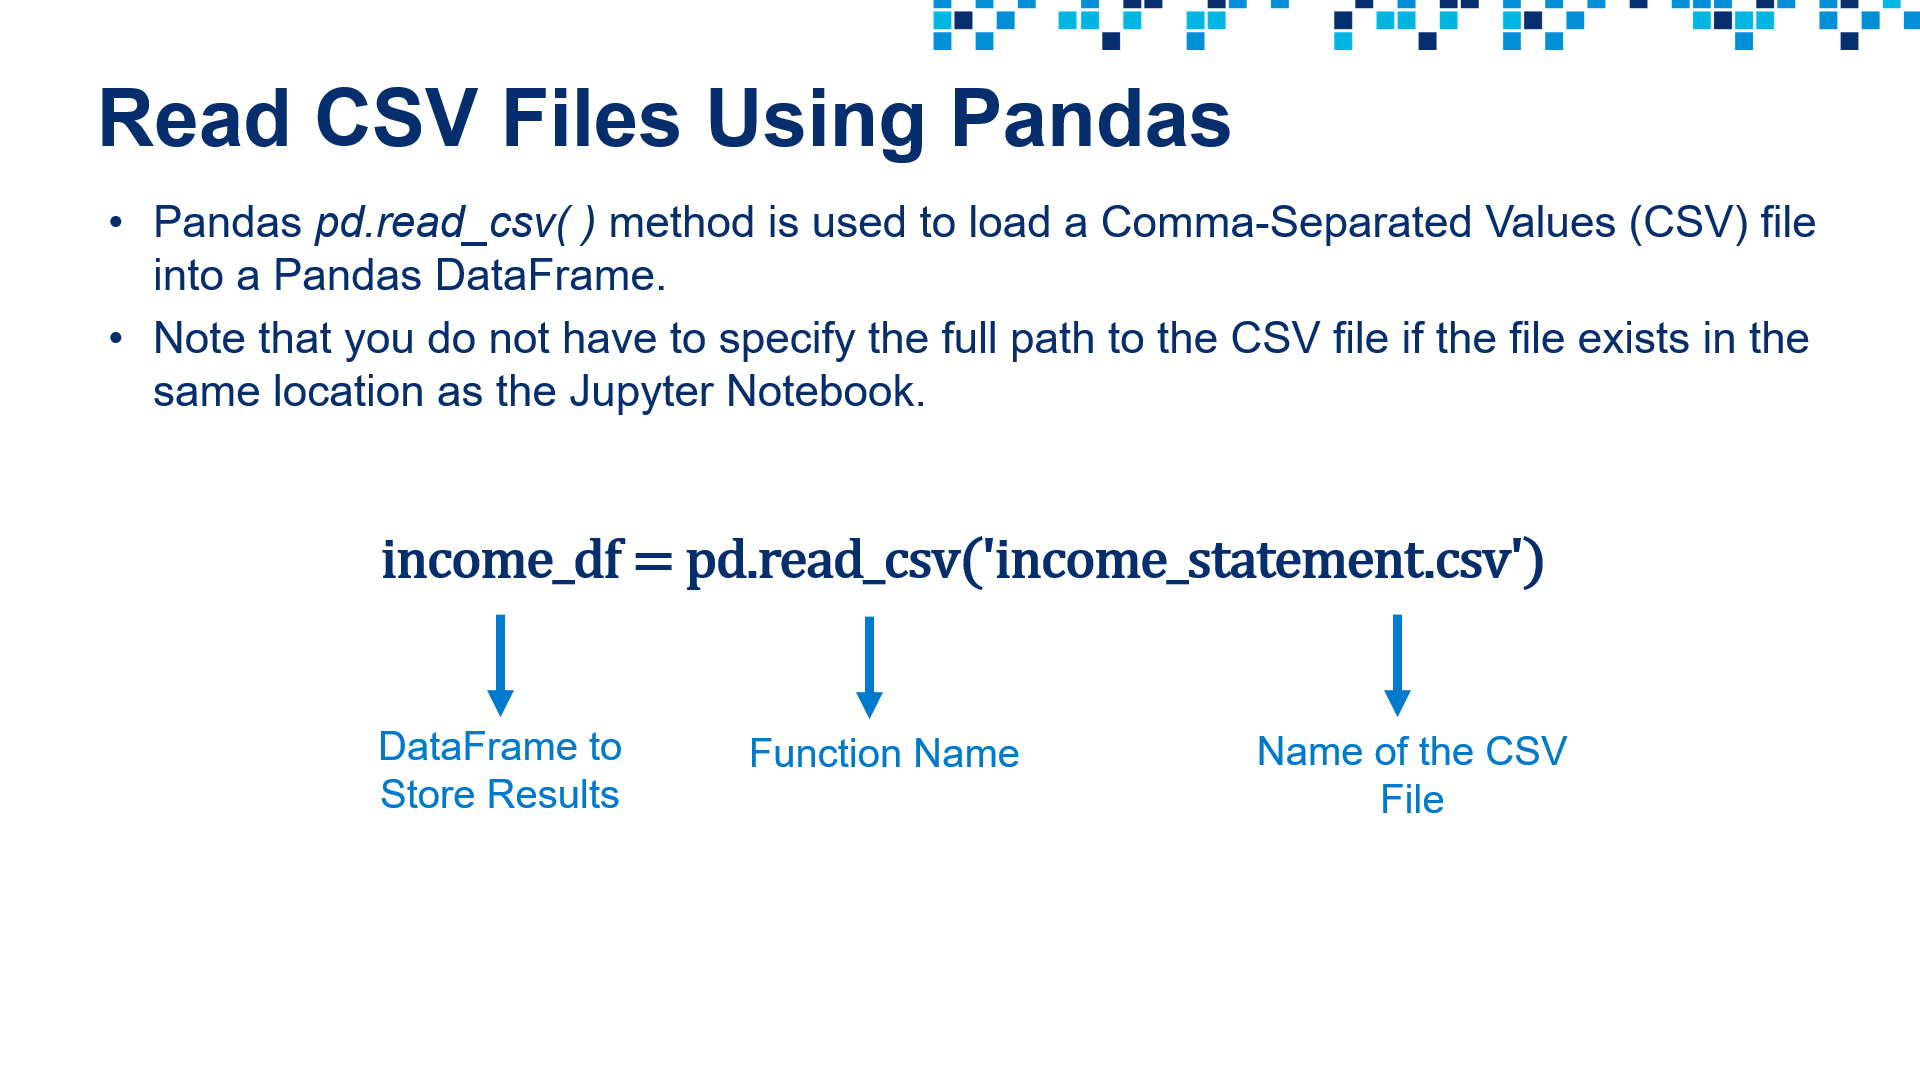

In [ ]:
# Note that SimFin might be limited in some geographical locations so this is an alternative method to using SimFin
# Let's use Pandas to read CSV files that contain income statements, cashflow statements and balance sheets
# These CSV files are included in the course package
income_df = pd.read_csv('income_statement.csv')
income_df

In [ ]:
# Let's use Pandas to read the CSV file that contains balance sheets
balance_df = pd.read_csv('balance_sheet.csv')
balance_df

In [ ]:
# Let's use Pandas to read the the CSV file that contains cashflow statements
cashflow_df = pd.read_csv('cashflow_statement.csv')
cashflow_df

In [ ]:
# Let's obtain general information about U.S. companies such as company name and ticker symbol
# Note that SimFinId is a unique identifier for each company 
# The IndustryId column contains information about the sector and the industry
# The first 3 digits of the IndustryId column represents a sector and the last 3 digits represents the industry
# The mapping of the Industry IDs to the sector and industry is available in a different dataset
# This technique is used to ensure efficiency and to avoid downloading a large amount of data

companies_info_df = pd.read_csv('companies_information.csv')
companies_info_df

In [ ]:
# Display the first rows in a Pandas DataFrame
companies_info_df.head(10)

In [ ]:
# Display the last rows in a Pandas DataFrame
companies_info_df.tail(10)

In [ ]:
# Let's use Pandas to read the the CSV file that contains industries information 
# The IndustryId column contains information about the sector and the industry
# The first 3 digits of the IndustryId column represents a sector and the last 3 digits represents the industry
industries_info_df = pd.read_csv('industries_information.csv')
industries_info_df.head(70)

In [ ]:
# Let's set the maximum number of rows to be displayed in a Pandas DataFrame to 70
# Note that the "Consumer Defensive" sector offers stable returns regardless of the state of the stock market 
# While "Consumer Cyclical" sector includes impulse and convenience goods such as cars, apparel, entertainment and travel 
pd.options.display.max_rows = 70
industries_info_df.head(70)

**PRACTICE OPPORTUNITY:**
- **Using Pandas, load U.S. companies information contained in the "companies_information.csv" file and store it in a Pandas DataFrame titled "companies_info_df"**
- **Use the head() method to display the first 15 rows in the "companies_info_df" Pandas DataFrame**
- **What is the ticker symbol and SimFinId for APPLE INC?**

# MERGE PANDAS DATAFRAMES

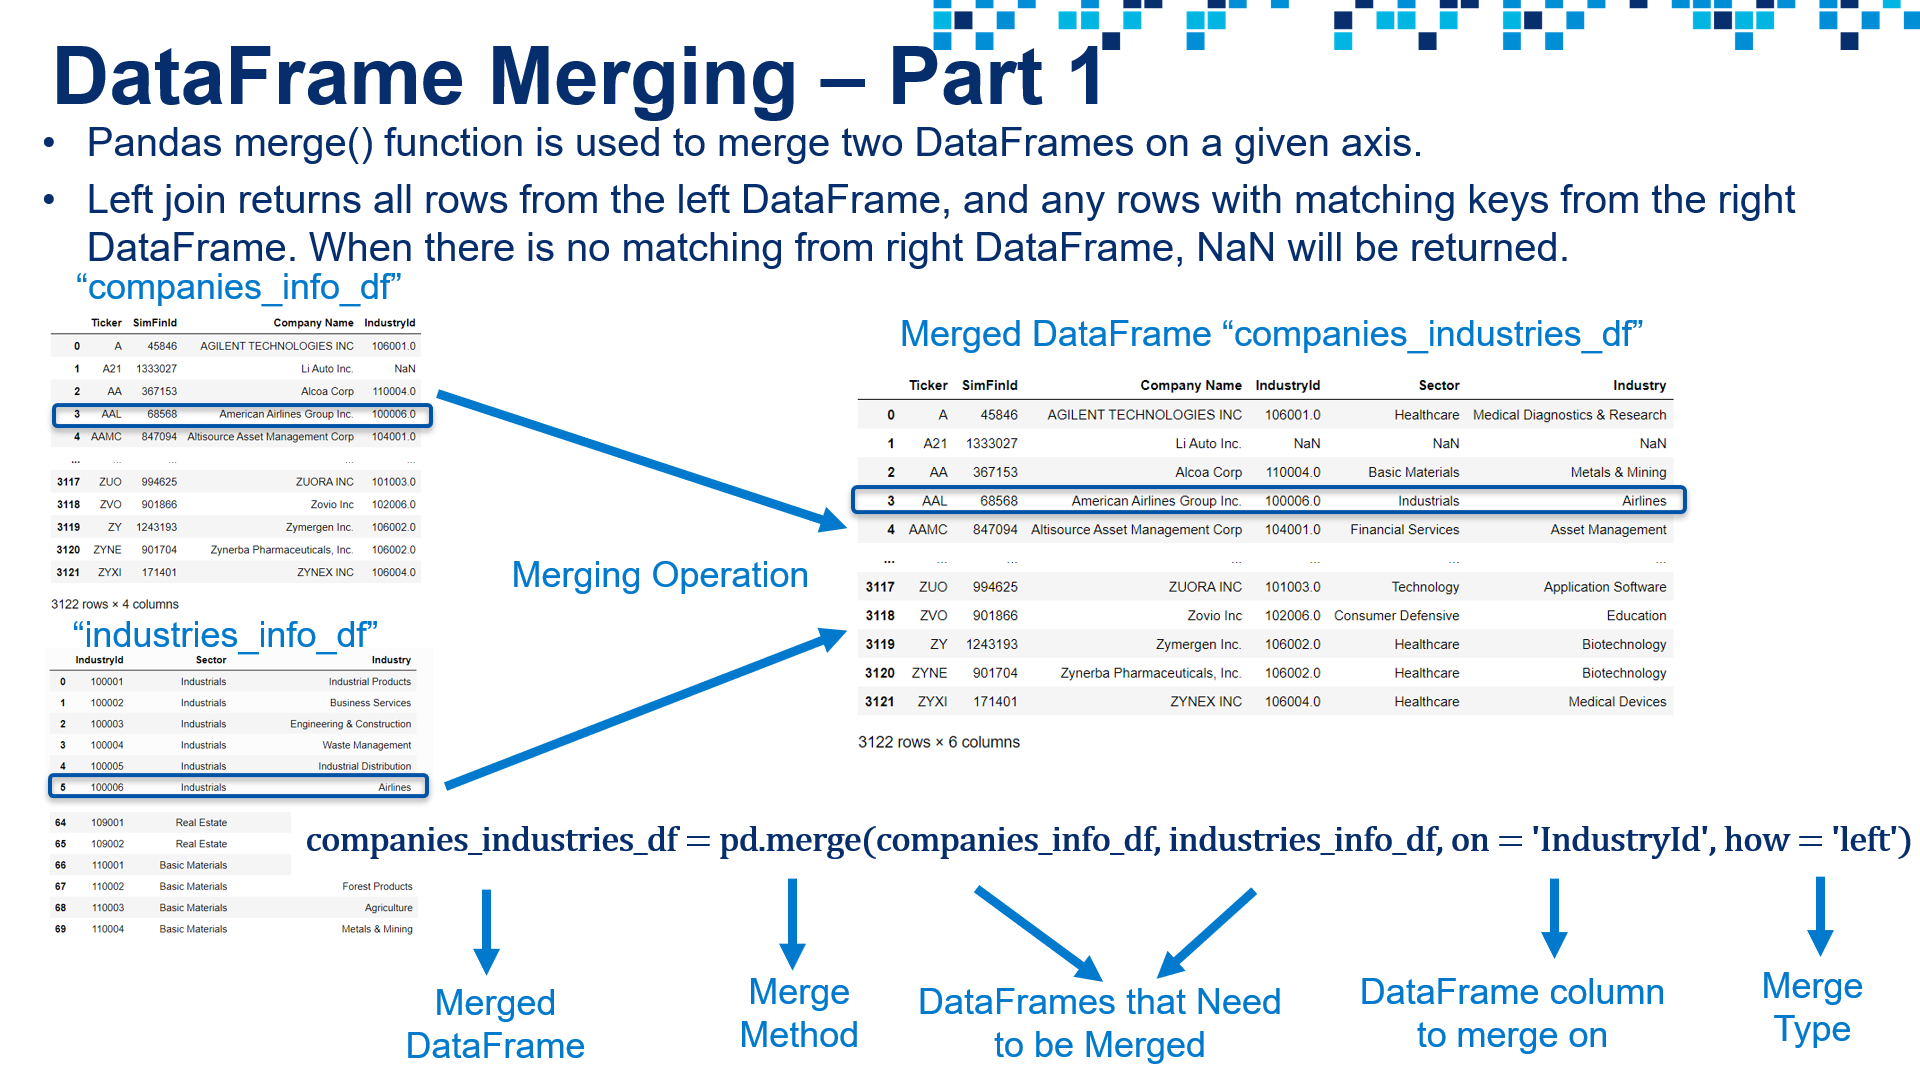

In [ ]:
# Let's display the companies information Pandas DataFrame
companies_info_df

In [ ]:
# Let's display the industries information Pandas DataFrame
industries_info_df.head(70)

In [ ]:
# Let's merge industries and companies information using the left join
# Note that left join returns all rows from the left DataFrame, and any rows with matching keys from the right DataFrame. 
# When there is no matching from right DataFrame, NaN will be returned

companies_industries_df = pd.merge(companies_info_df, industries_info_df, on = 'IndustryId', how = 'left')
companies_industries_df

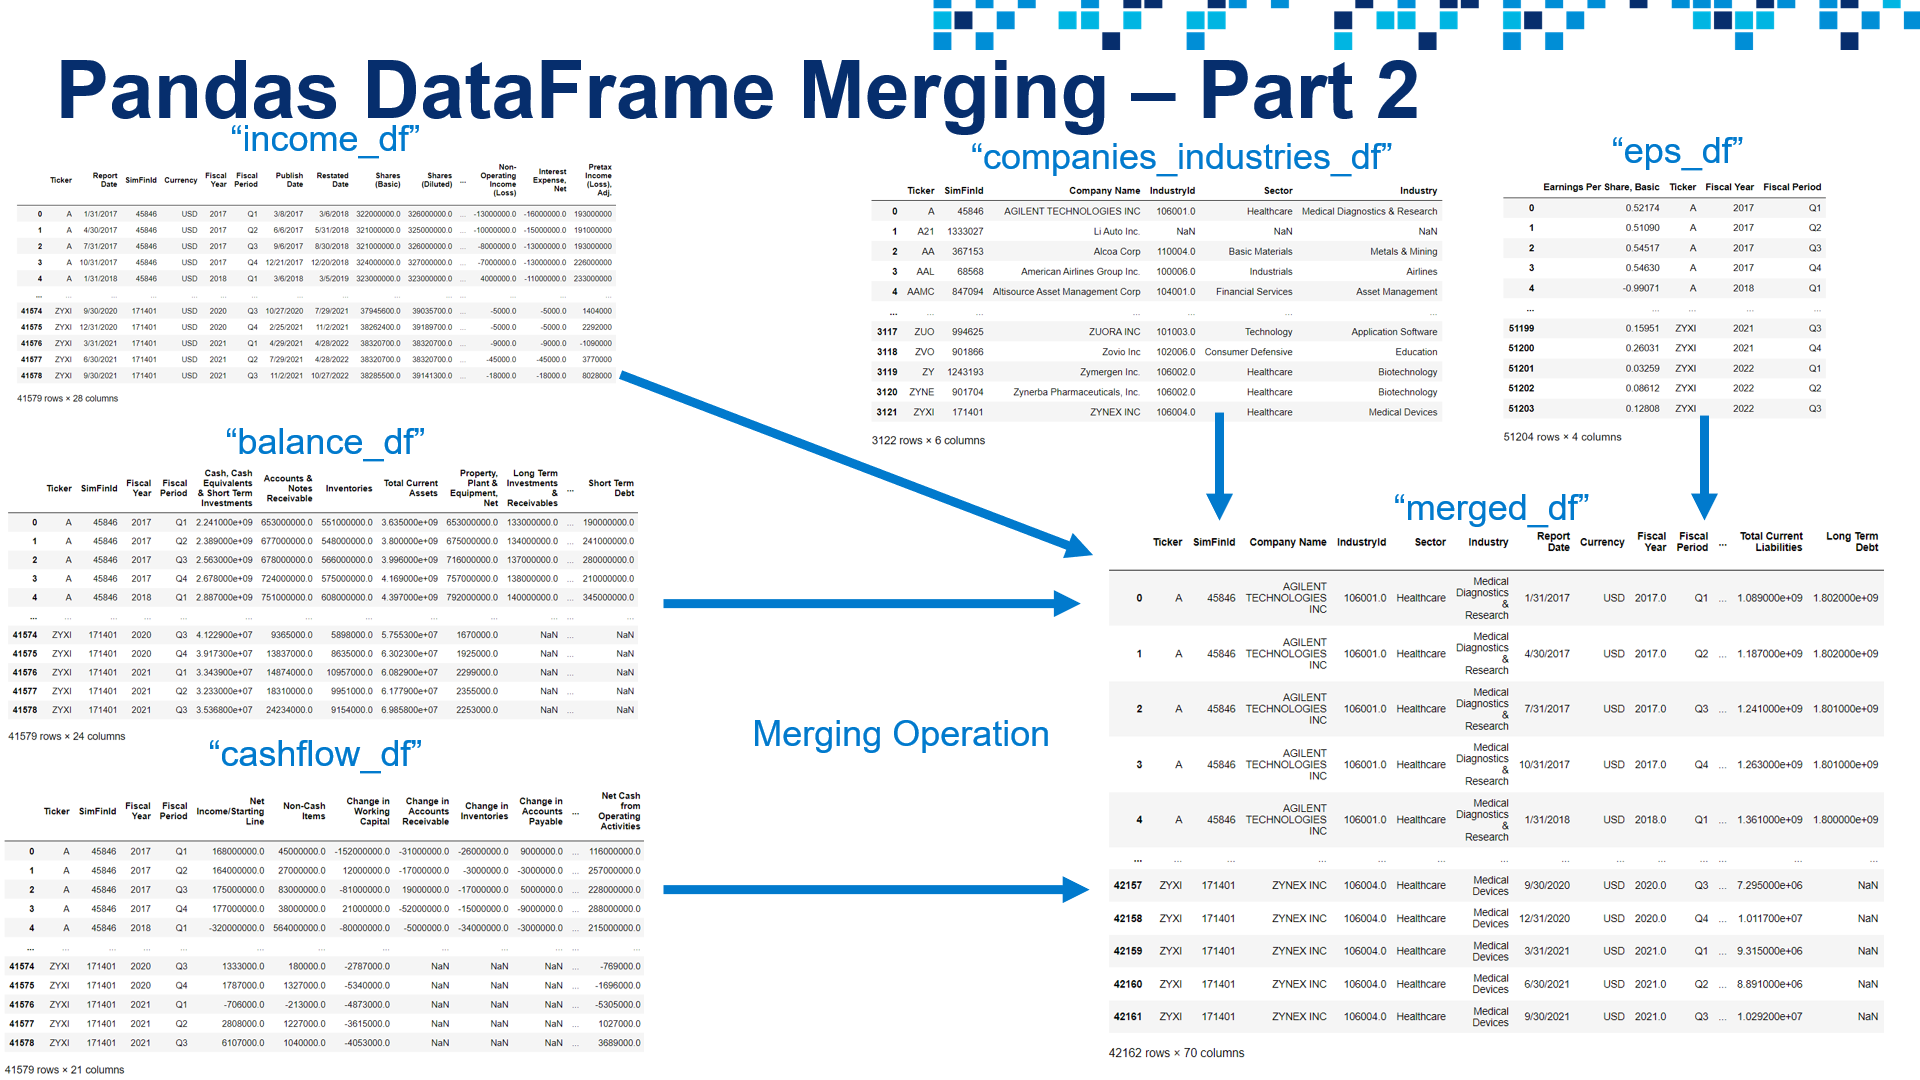

In [ ]:
# Let's read the Earnings-per-share (EPS) dataset
# Note that EPS is the target column when we train our machine learning model 
eps_df = pd.read_csv('eps_df.csv')
eps_df

In [ ]:
# Now let's merge all Pandas DataFrames together
# Let's drop duplicate columns across the 3 financial statements 
cashflow_df = cashflow_df.drop(columns = ['Report Date', 
                                          'Currency', 
                                          'Publish Date', 
                                          'Restated Date', 
                                          'Shares (Basic)', 
                                          'Shares (Diluted)', 
                                          'Depreciation & Amortization'])
cashflow_df

In [ ]:
# Let's drop duplicate columns in the balance sheet statements
balance_df = balance_df.drop(columns = ['Report Date', 
                                        'Currency', 
                                        'Publish Date', 
                                        'Restated Date', 
                                        'Shares (Basic)', 
                                        'Shares (Diluted)'])
balance_df

In [ ]:
# Let's display the income_df Pandas DataFrame
income_df

In [ ]:
# Let's merge income statement, cashflow statement, balance sheet, EPS with the financial data
merged_df = companies_industries_df.merge(income_df, on = ['Ticker','SimFinId'], how = 'left')\
                                   .merge(cashflow_df, on = ['Ticker','SimFinId', 'Fiscal Year','Fiscal Period'], how = 'left')\
                                   .merge(balance_df, on = ['Ticker','SimFinId','Fiscal Year','Fiscal Period'], how = 'left')\
                                   .merge(eps_df, on = ['Ticker','Fiscal Year','Fiscal Period'], how = 'left')
merged_df

In [ ]:
# Let's drop SimFinId and IndustryID columns since this information is already provided by other columns
merged_df = merged_df.drop(columns = ['SimFinId','IndustryId'])

In [ ]:
# Check out the shape of the merged Pandas DataFrame
# The shape property is used to obtain the number of rows and columns in a Pandas DataFrame
merged_df.shape

In [ ]:
# Let's obtain the number of unique ticker symbols in the dataset
len(merged_df['Ticker'].unique().tolist())

In [ ]:
# Let's obtain a Python List containing unique ticker symbols
merged_df['Ticker'].unique().tolist()

**PRACTICE OPPORTUNITY:**
- **Display the first 70 rows in "industries_info_df" and "companies_info_df" Pandas DataFrames**
- **Merge the "industries_info_df" and "companies_info_df" Pandas DataFrames using "right" join type instead of "left" and place the answer in a new Pandas DataFrame titled "companies_industries_right_df"**

# LOCATE, COUNT AND HANDLE MISSING VALUES

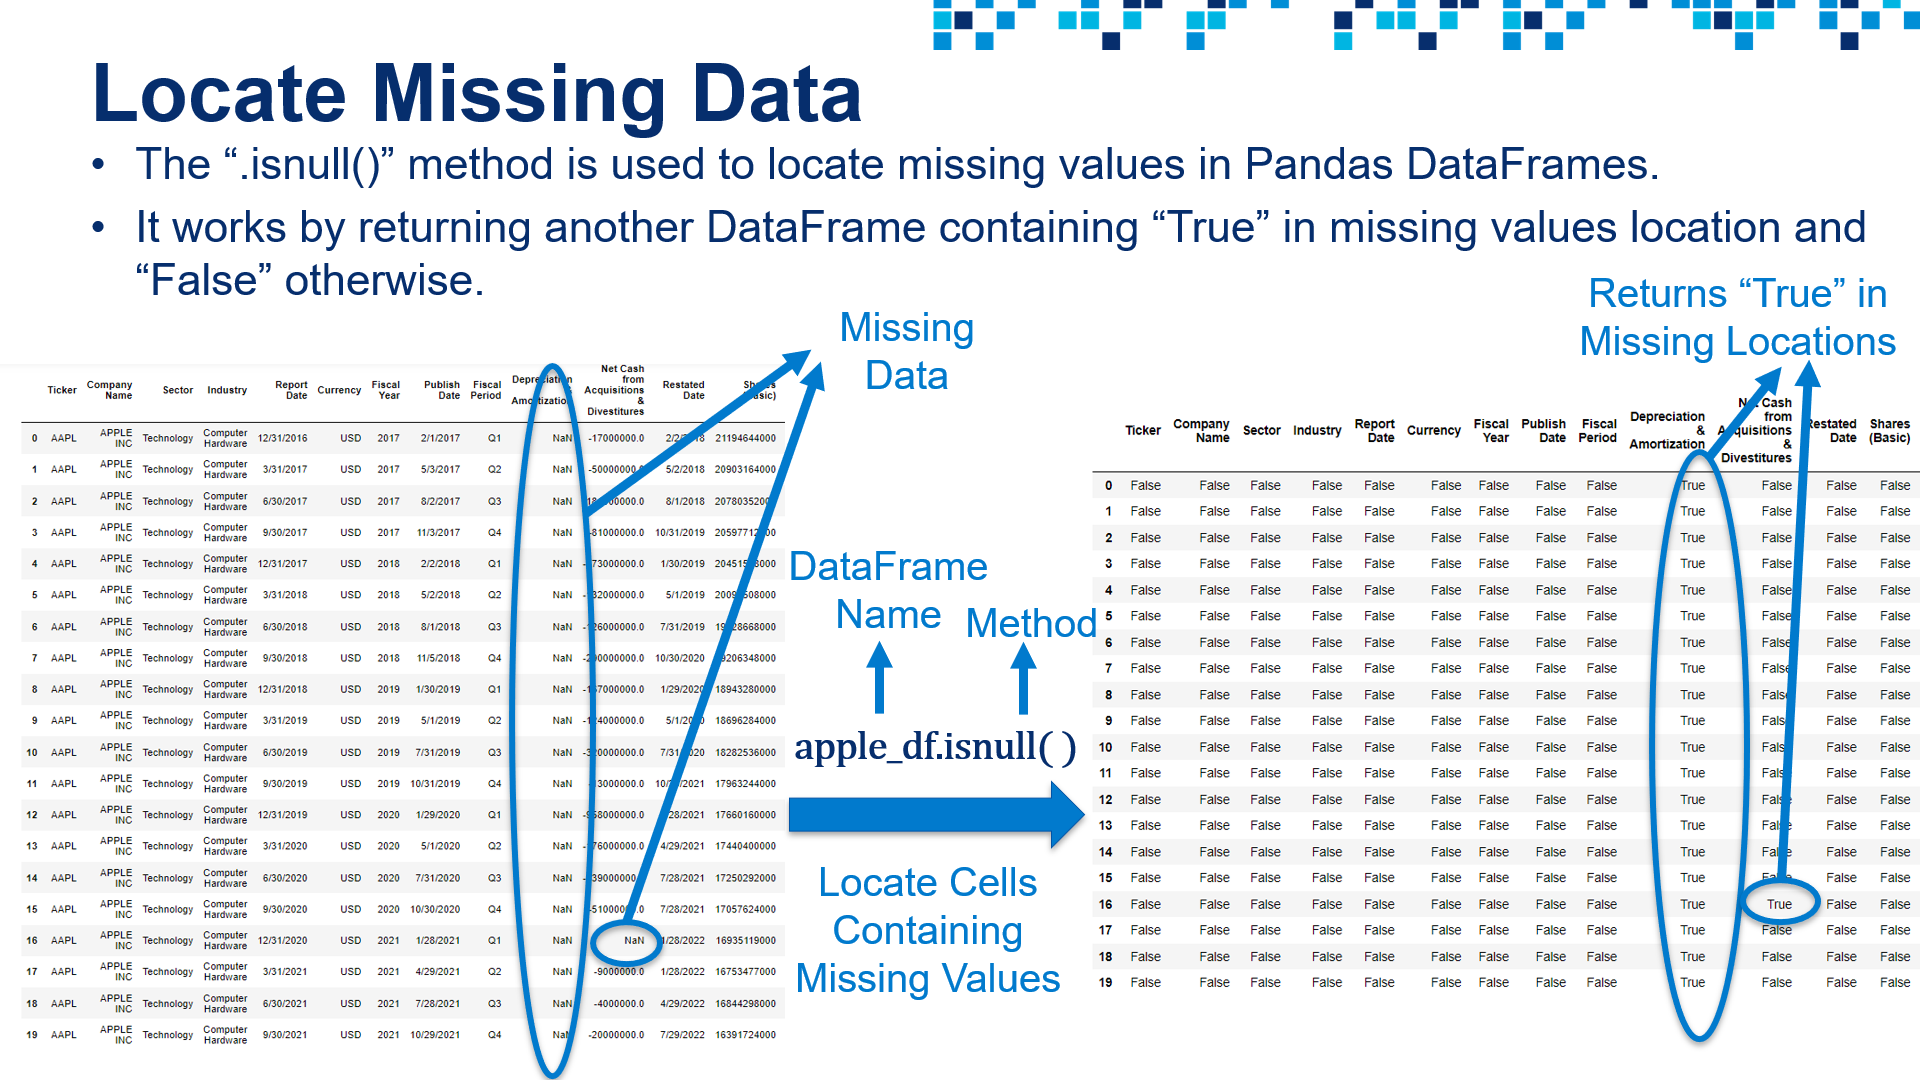

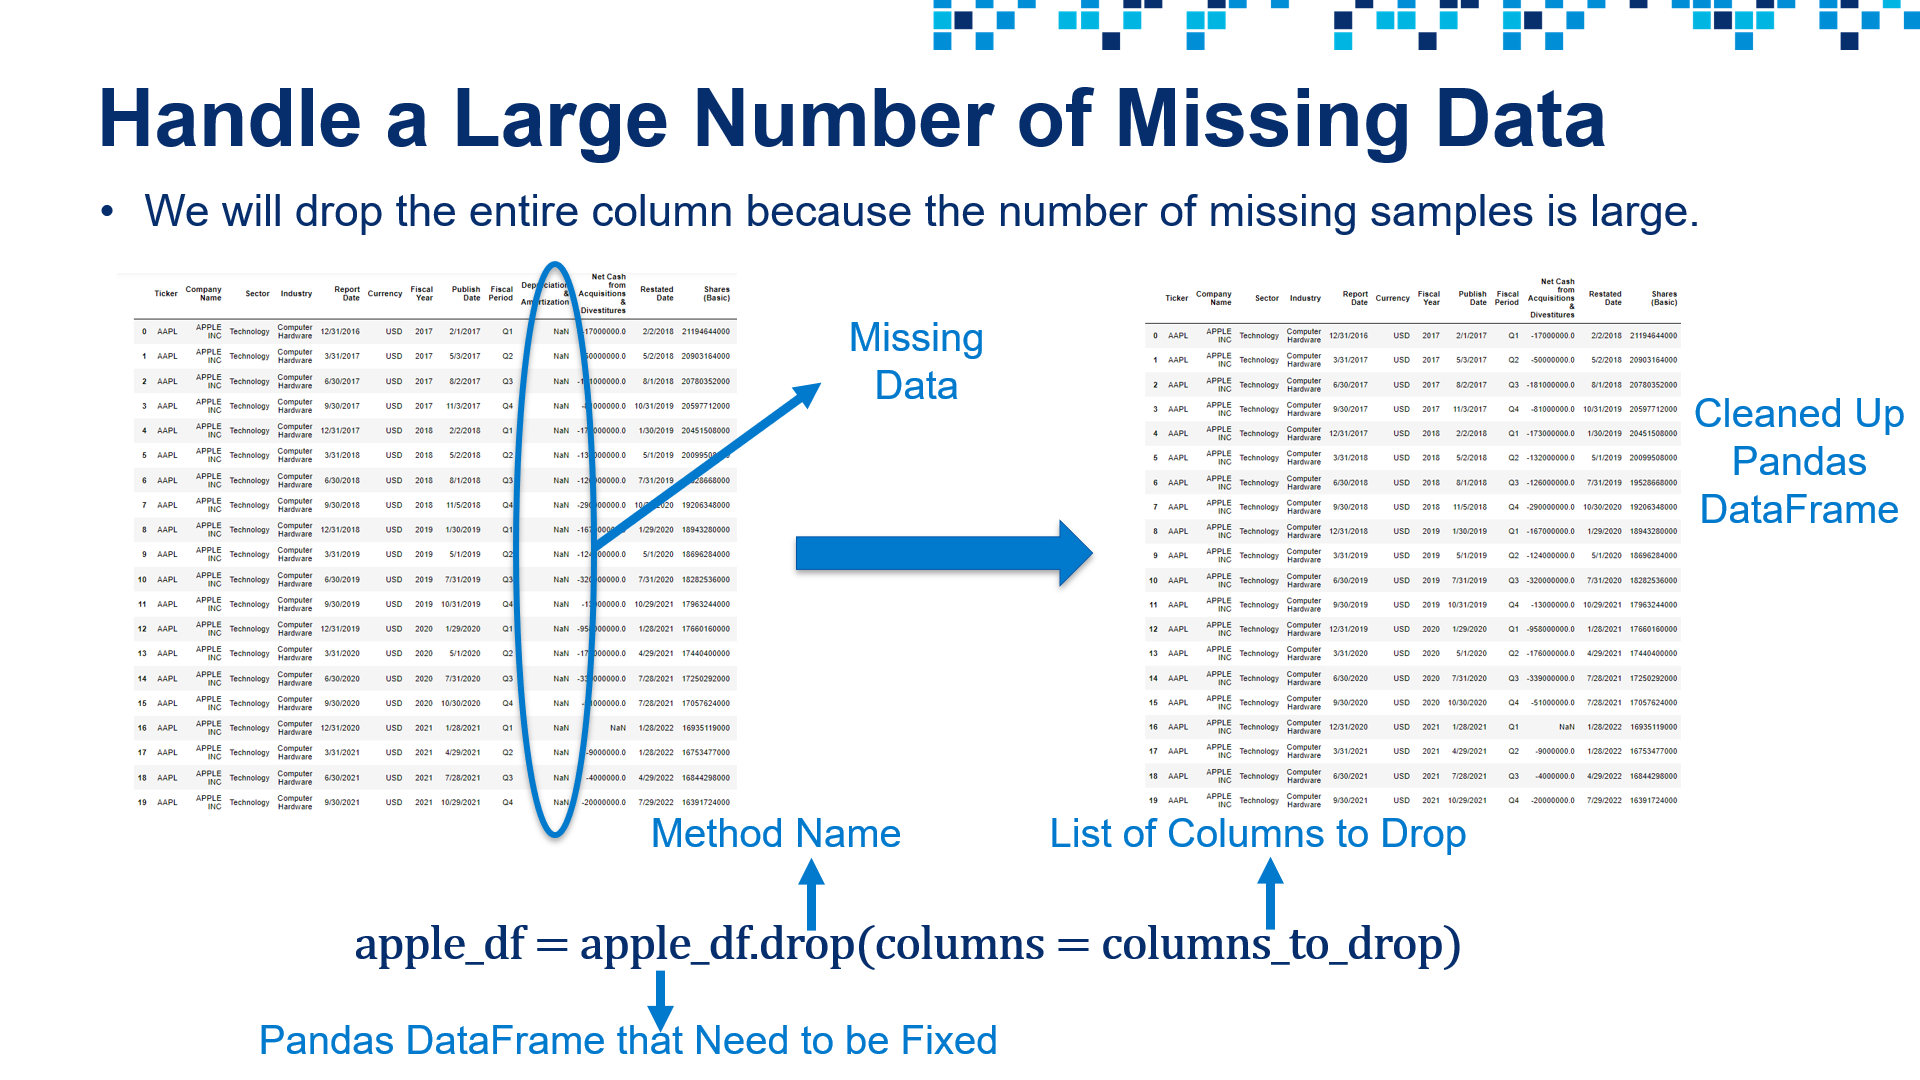

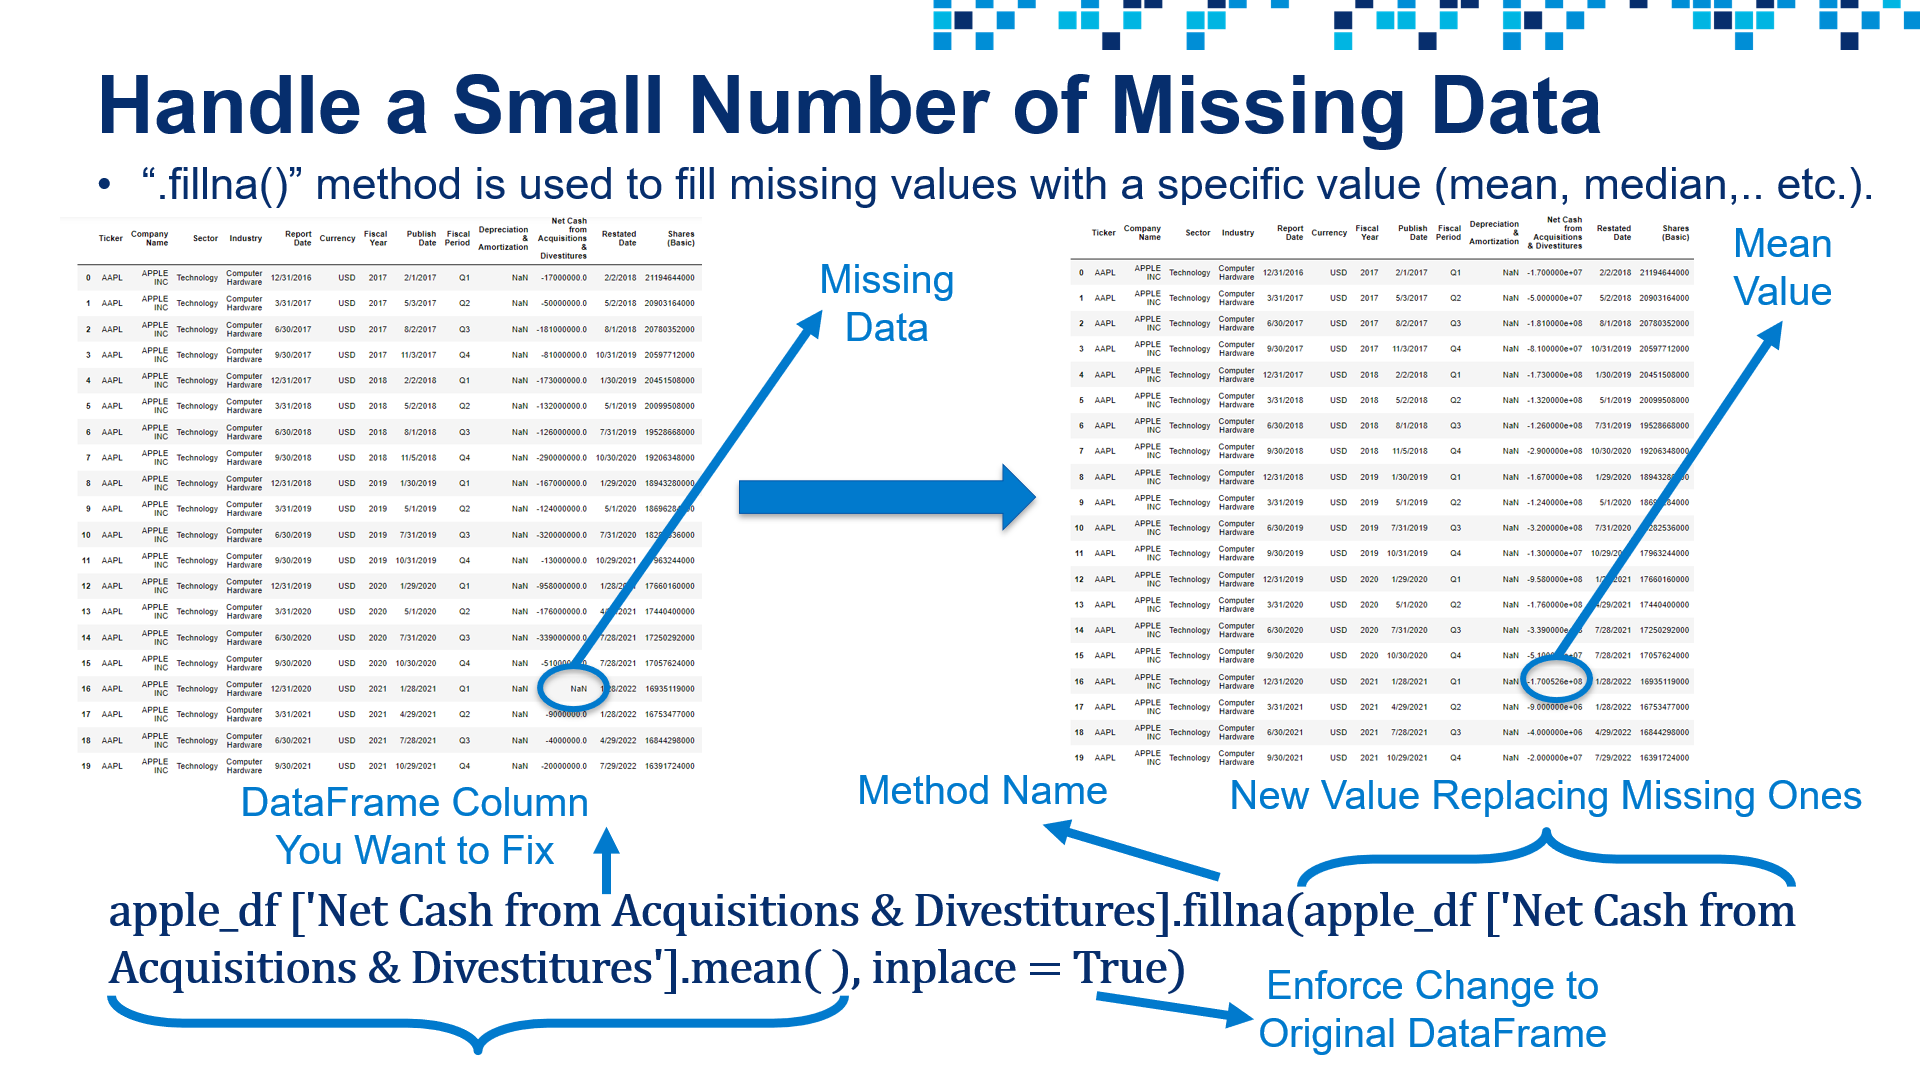

In [ ]:
# Let's view the merged Pandas DataFrame
merged_df

In [ ]:
# For demonstration purposes, we are going to perform data cleaning operation on one ticker symbol "AAPL"
# Similar process can be applied to all ticker symbols
# Let's set the maximum number of columns to be displayed to 70
# The objective is to find the location of missing values
pd.options.display.max_columns = 70
apple_df = merged_df[merged_df['Ticker'] == 'AAPL'].reset_index(drop = True)
apple_df

In [ ]:
# Let's use the .isnull() method to find missing values in the Pandas DataFrame 
apple_df.isnull()

In [ ]:
# Let's sum up all missing values
apple_df.isnull().sum()

In [ ]:
# Let's calculate the percentage of missing values in each column and place it in a Pandas DataFrame
percentage_missing  = apple_df.isnull().sum() * 100 / len(apple_df)
percentage_missing_df = pd.DataFrame({'% Missing': percentage_missing}).reset_index()
percentage_missing_df

In [ ]:
# Let's sort out the percentage of missing values in a descending order
percentage_missing_df = percentage_missing_df.sort_values(by = '% Missing', ascending = False)
percentage_missing_df

In [ ]:
# Import plotly Express which is used for data visualization
!pip install plotly
import plotly.express as px

# Let's use Plotly Express to view missing values
fig = px.bar(percentage_missing_df, x = 'index', y = '% Missing')
fig.update_layout(title = dict(text = 'Column Names Vs. % Missing Values'),\
                  xaxis = dict(title = 'Index', tickmode = 'linear'))
fig.show()

In [ ]:
# Let's create a list of columns that contain a large number of missing values above 50% for example
columns_to_drop = percentage_missing_df[ percentage_missing_df['% Missing'] > 50 ]['index'].tolist()
columns_to_drop

In [ ]:
# Let's drop features (columns) that have more than 50% missing values
apple_df = apple_df.drop(columns = columns_to_drop)
apple_df

In [ ]:
# Let's check if we still have any missing values
apple_df.isnull().sum()

In [ ]:
# Calculate the average Net Cash from Acquisitions & Divestitures
apple_df['Net Cash from Acquisitions & Divestitures'].mean()

In [ ]:
# You can use fillna() to fill a given column with a certain value
apple_df['Net Cash from Acquisitions & Divestitures'].fillna(apple_df['Net Cash from Acquisitions & Divestitures'].mean(), inplace = True)
apple_df

In [ ]:
# Checking null value
apple_df.isnull().sum()

**PRACTICE OPPORTUNITY:** 
- **Write a Python code that performs the following tasks:**
    - **Filter rows in "merged_df" Pandas DataFrame to only include Amazon data with Ticker Symbol 'AMZN'. Place the output in a Pandas DataFrame titled "amazon_df"**
    - **Count the number of missing values in every column in "amazon_df" Pandas DataFrame**
    - **Calculate the percentage of missing values in every column in "amazon_df" Pandas DataFrame**
    - **Handle missing values in "amazon_df" Pandas DataFrame by dropping columns containing more than 50% of Null values** 
    - **Replace missing values with the median column value if missing values represent less than 50% of a given column** 
    - **Perform a sanity check to ensure that all missing values have been properly handled**

# PERFORM ONE-HOT ENCODING

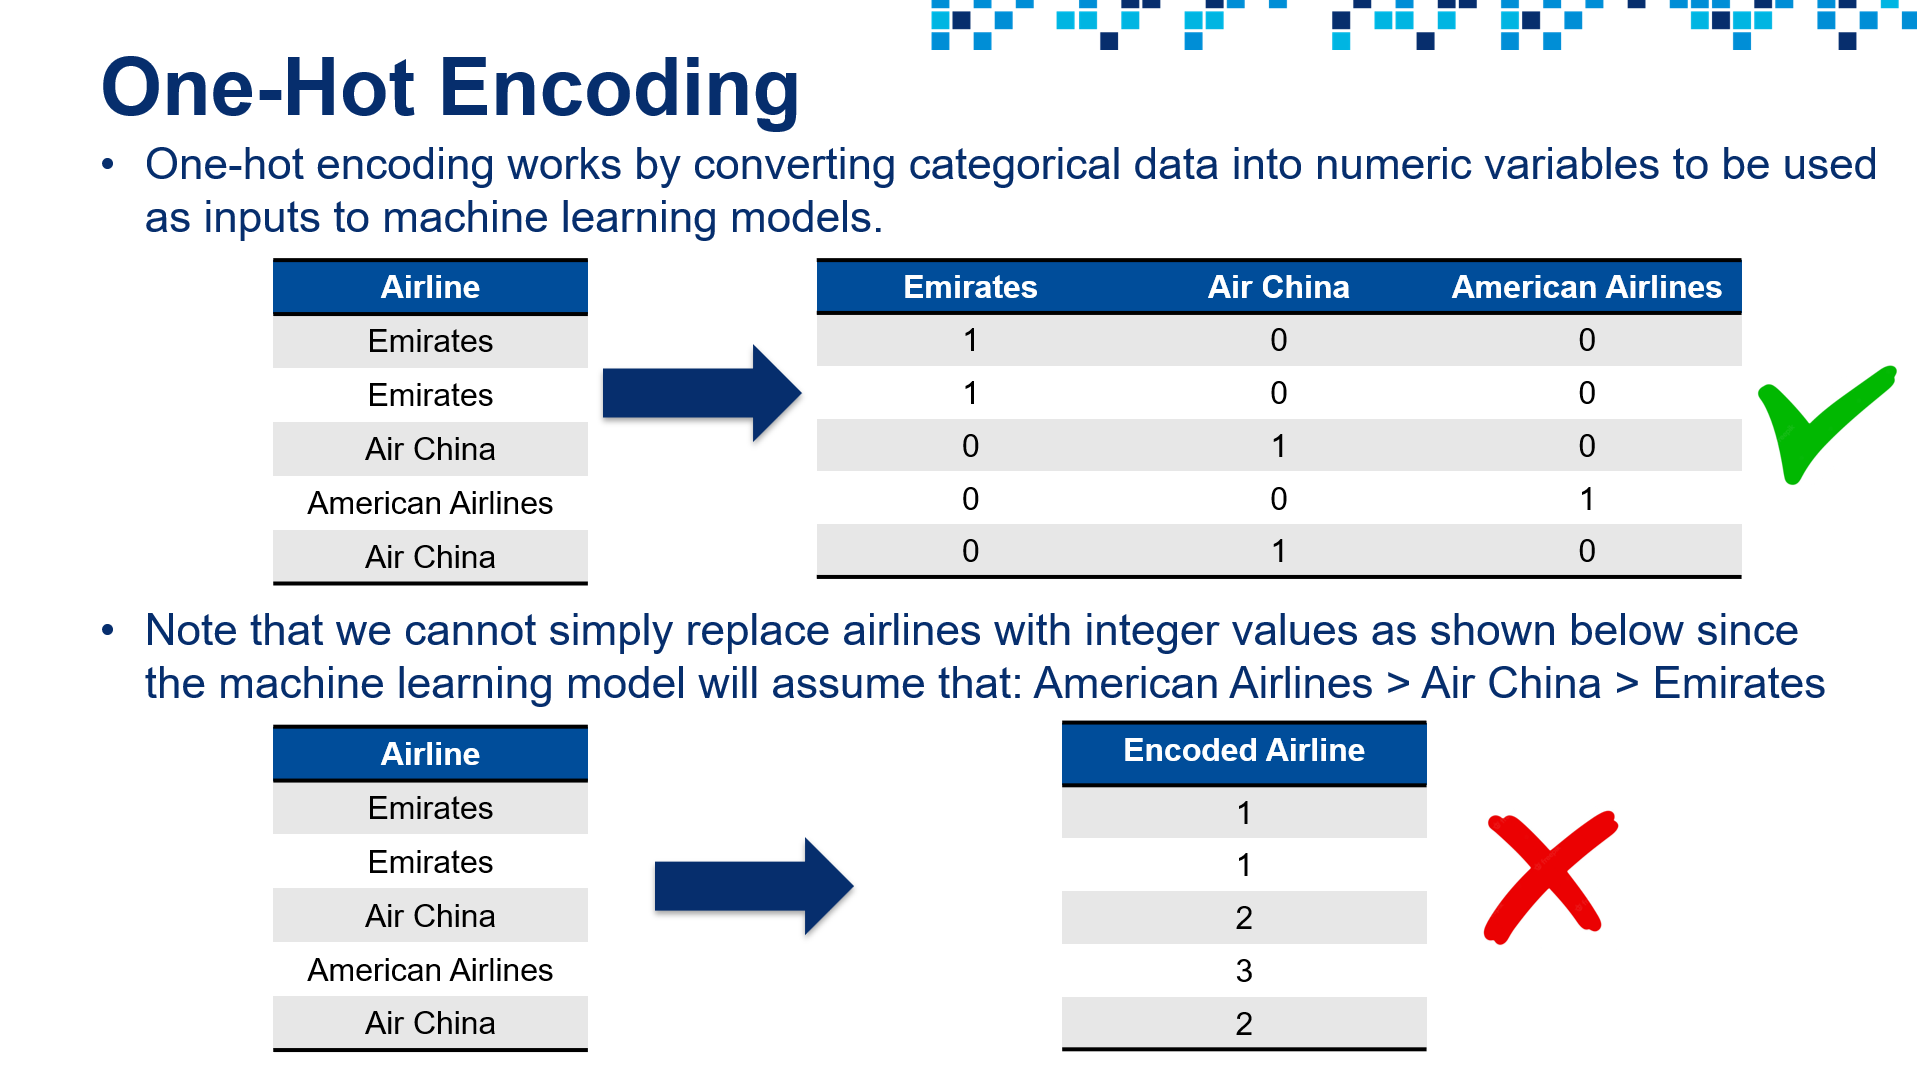

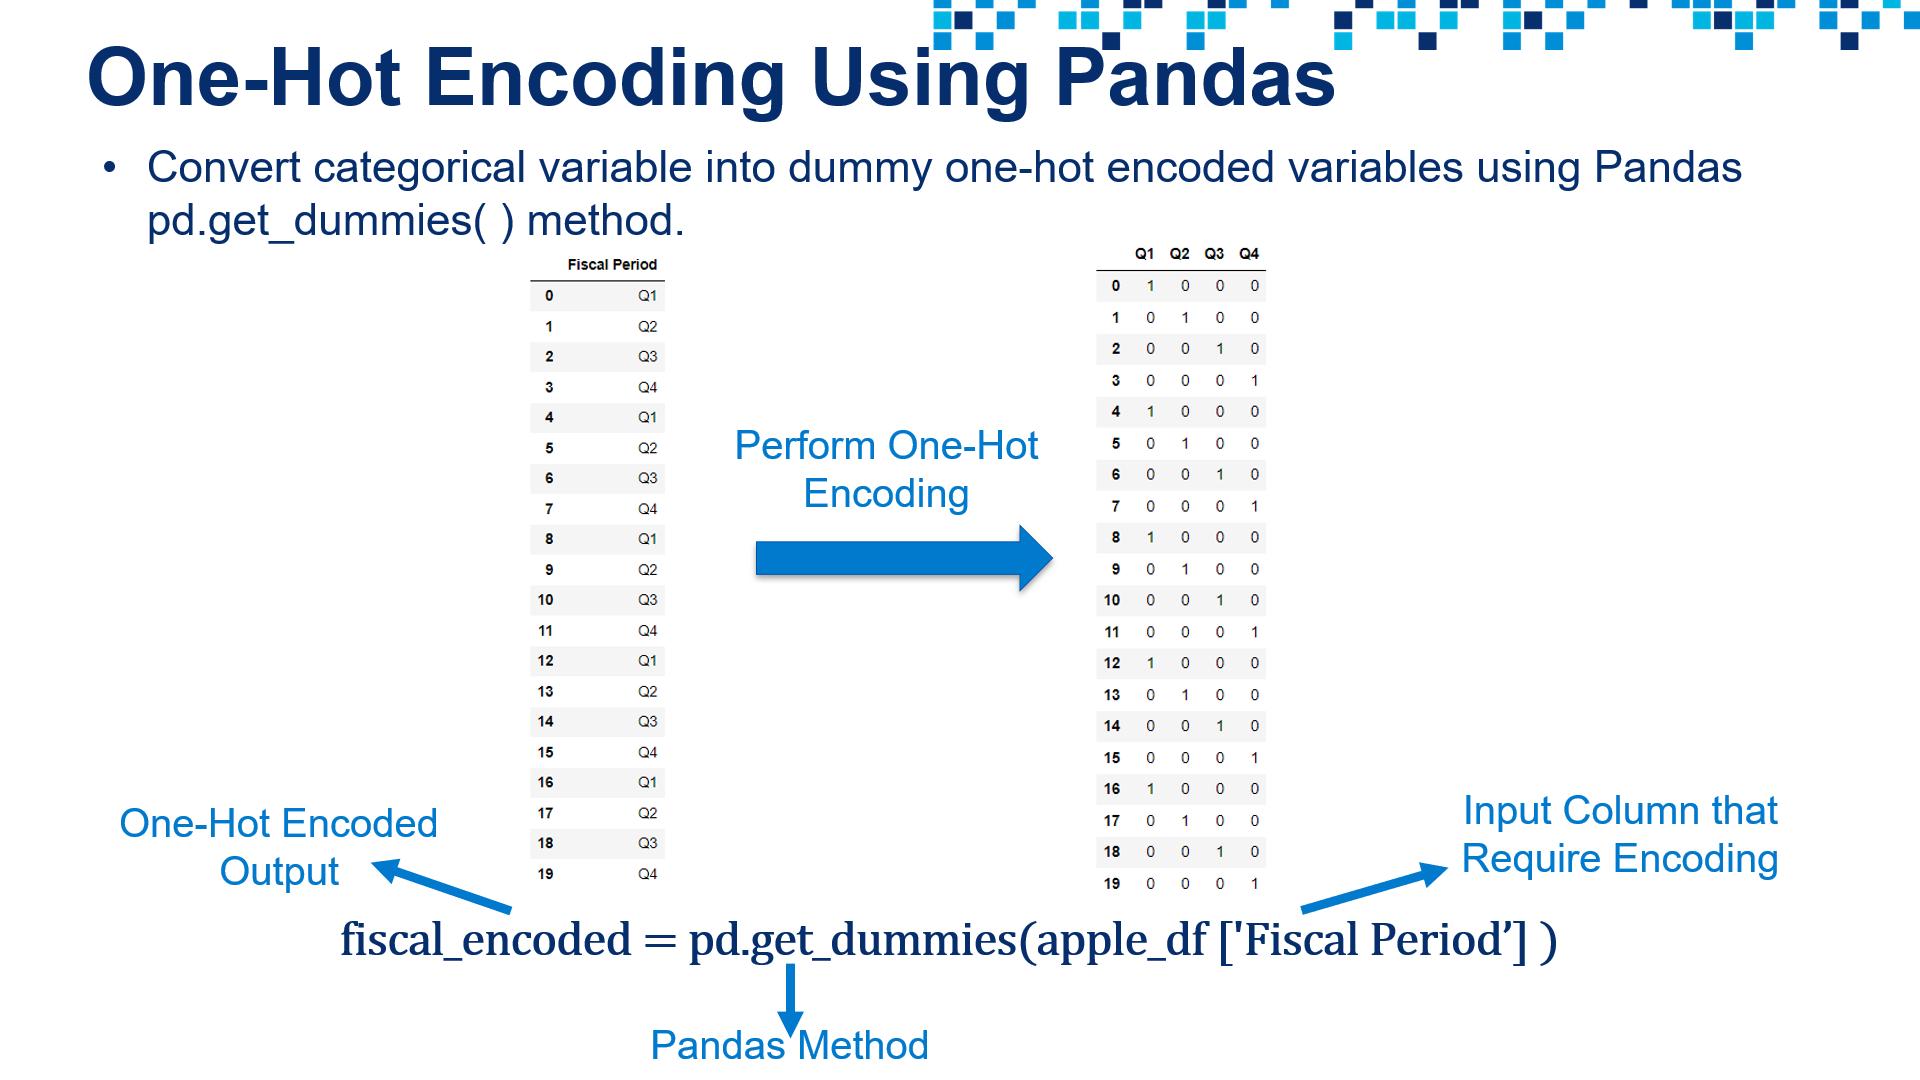

In [ ]:
# Let's perform one-hot encoding to the "Fiscal Period" column
# Let's display the original "Fiscal Period" column
print(apple_df['Fiscal Period'])

In [ ]:
# Let's obtain the one-hot encoded version of the "Fiscal Period" column
fiscal_encoded = pd.get_dummies(apple_df['Fiscal Period'])
fiscal_encoded

In [ ]:
# Drop the 'Fiscal Period' column from the original Pandas DataFrame
apple_df = apple_df.drop('Fiscal Period', axis = 1)

# Concatenate the original DataFrame and the one-hot encoded "Fiscal Period" column
apple_df = pd.concat([apple_df, fiscal_encoded], axis = 1)
apple_df

**PRACTICE OPPORTUNITY:**
- **Write a Python code that performs the following tasks:**
    - **Filter rows in "merged_df" Pandas DataFrame to only include Amazon data with Ticker Symbol 'AMZN'. Place the output in a Pandas DataFrame titled "amazon_df"**
    - **Perform one-hot encoding to the "Fiscal Period" column in the "amazon_df" using Pandas pd.get_dummies()**

# PERFORM FEATURE ENGINEERING

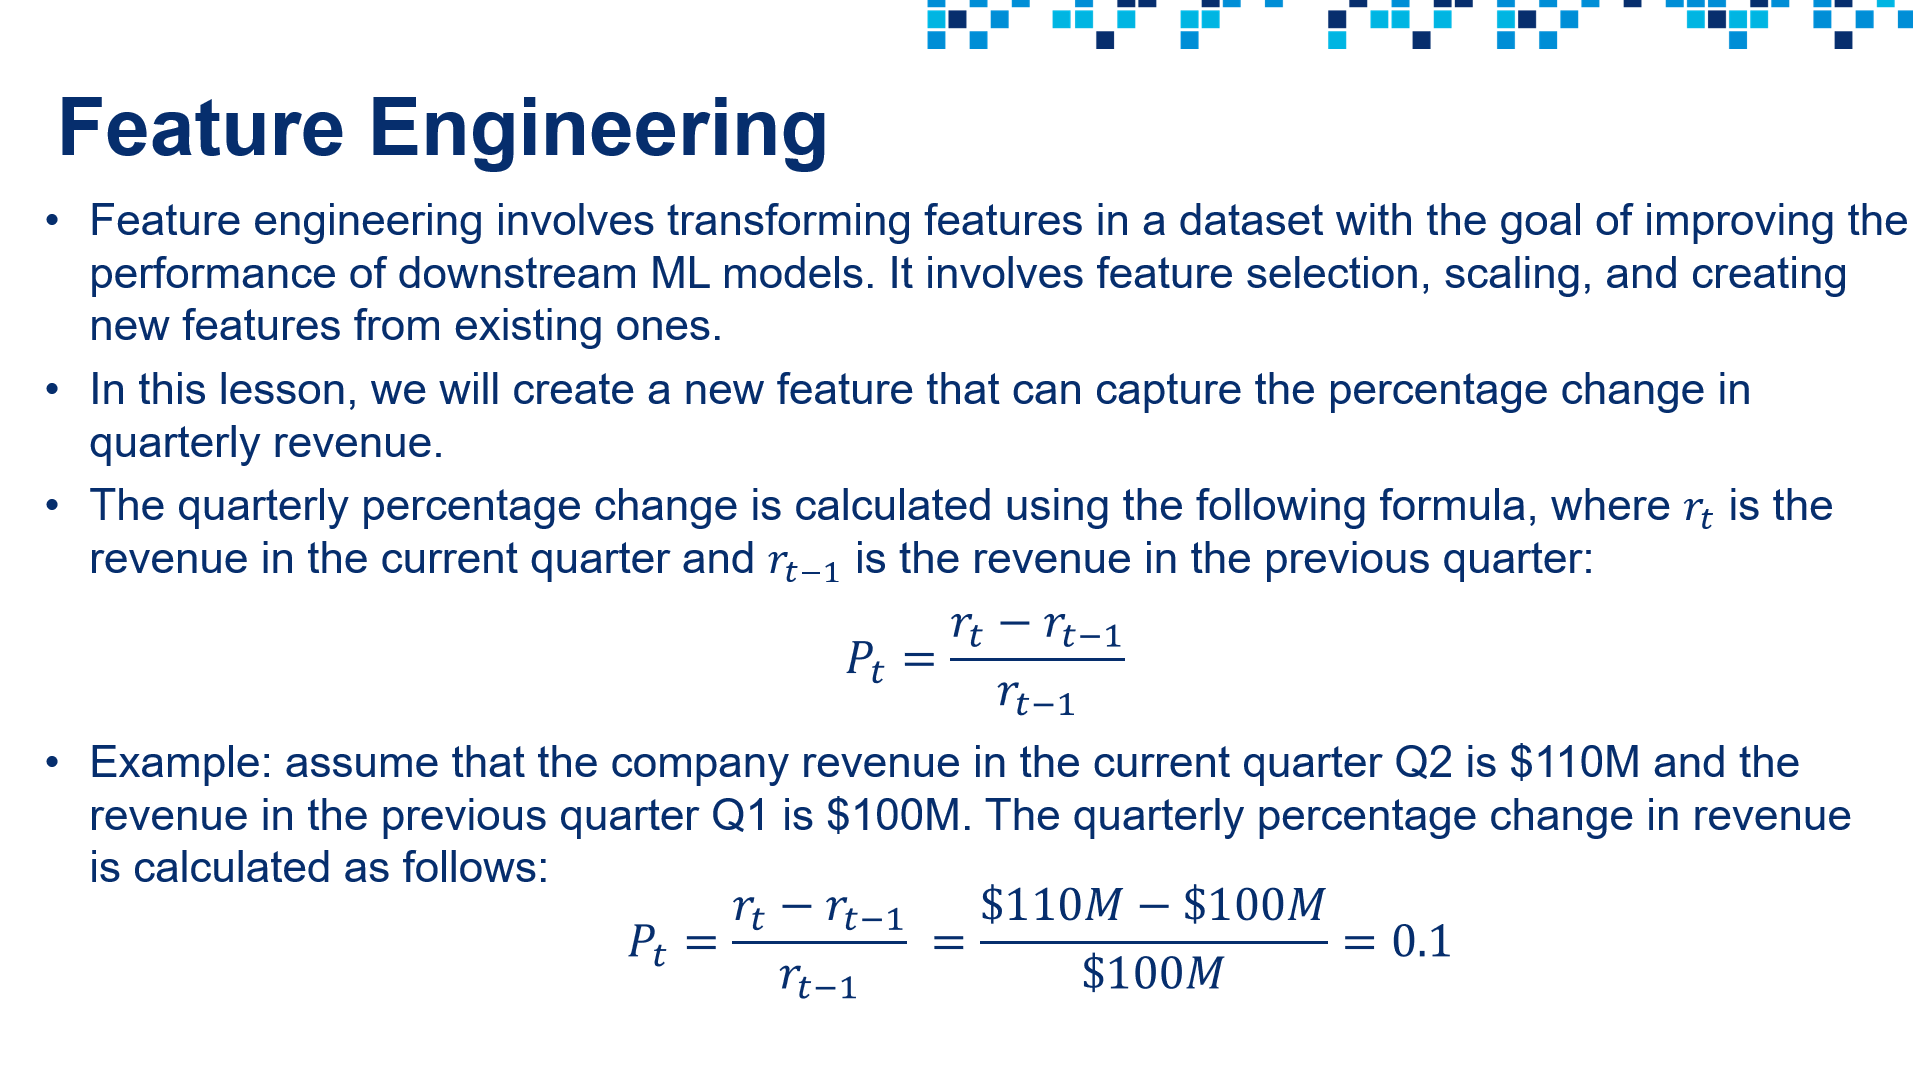

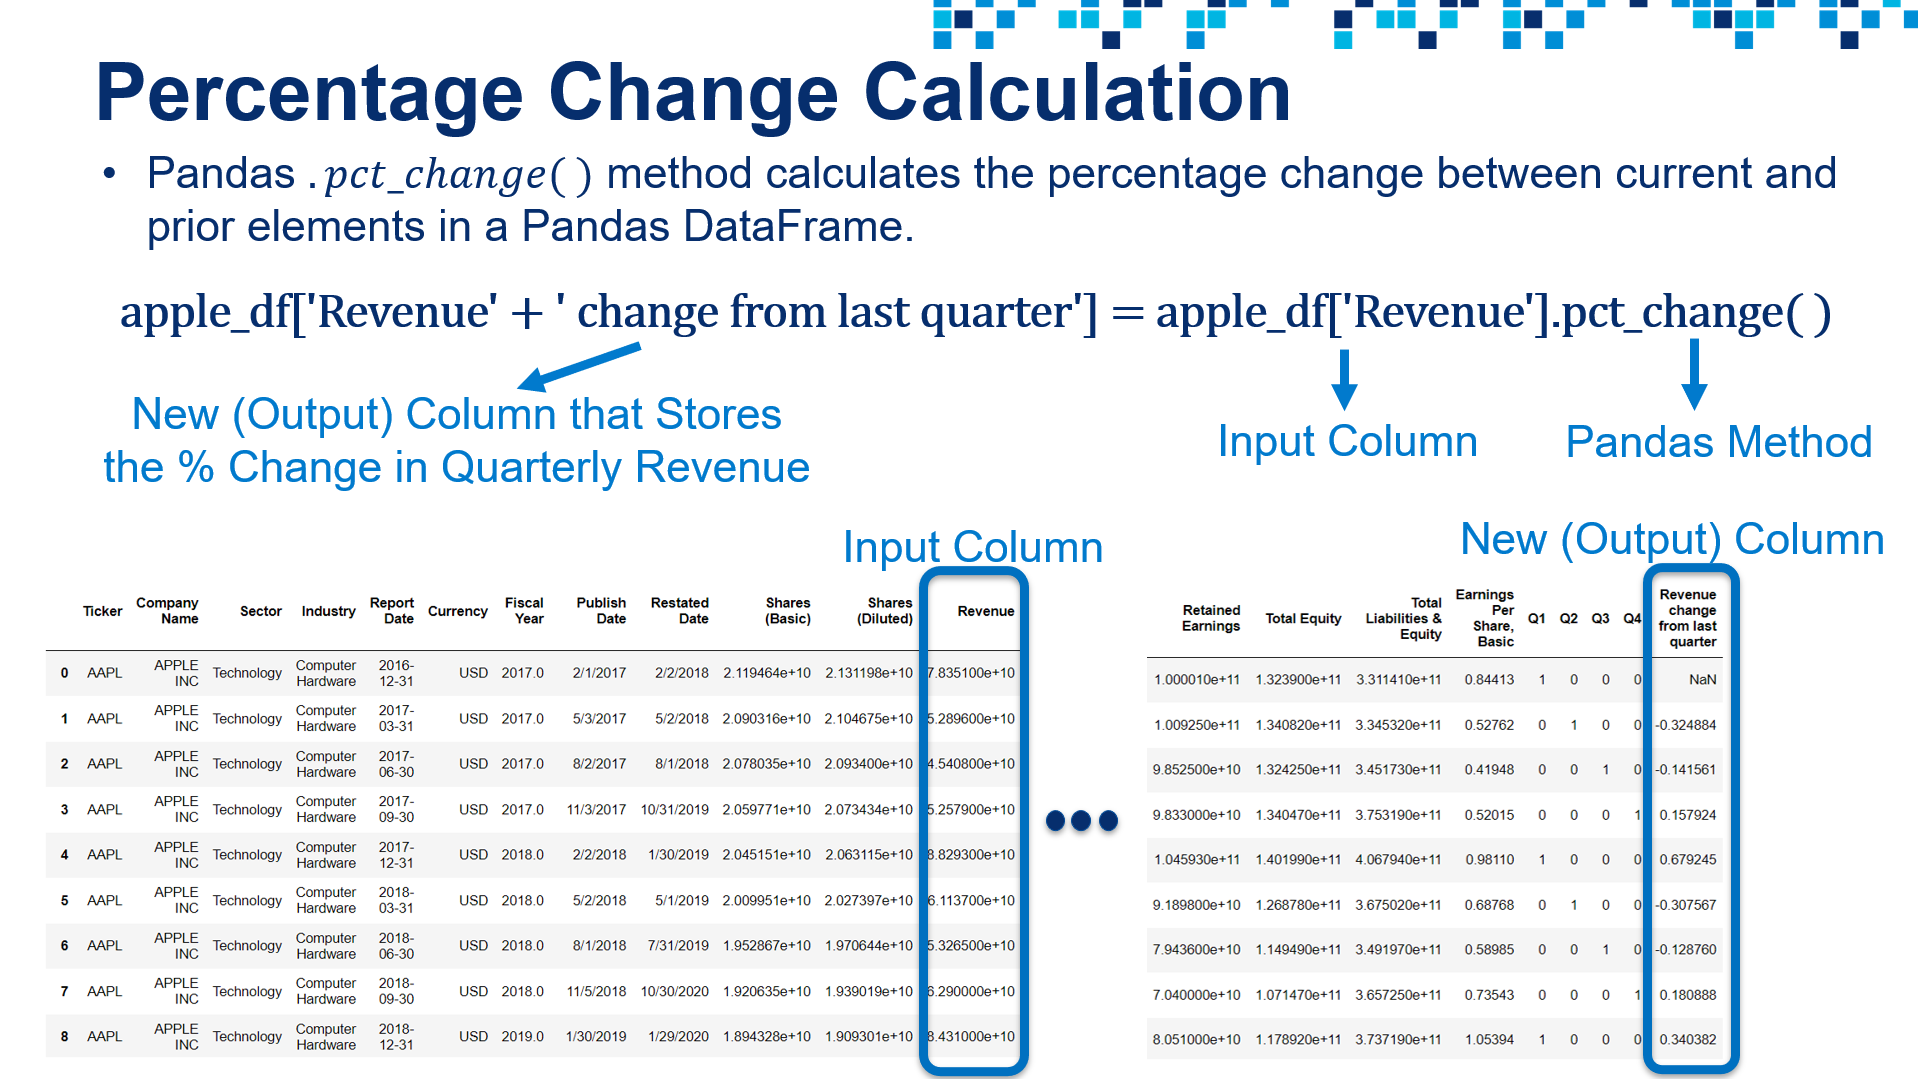

In [ ]:
# Let's check out the data type for each column using the info method
# Note that "Report Date" is listed as an Object data type
apple_df.info()

In [ ]:
# Let's convert the "Report Date" column to datetime
# This step is important when we sort the Pandas DataFrame and to perform date time operations
apple_df['Report Date'] = pd.to_datetime(apple_df['Report Date'], format = '%m/%d/%Y')

In [ ]:
# Let's check out the data type for each column using the info method after the conversion 
# Note that "Report Date" is now listed as datetime64 
apple_df.info()

In [ ]:
# Let's sort the "apple_df" Pandas DataFrame using the "Report Date" column
# Please note that the data obtained from SimFin might have been already sorted 
apple_df = apple_df.sort_values(by = 'Report Date').reset_index(drop = True)
apple_df

In [ ]:
# Let's perform feature engineering by creating a new feature that can capture the percentage change in quarterly revenue
# pct_change() calculates the change is percentage from last quarter to current quarter
# These new features might provide some insights to the model on how company performance changed from last quarter to this quarter

apple_df['Revenue' + ' change from last quarter'] = apple_df['Revenue'].pct_change()
apple_df

In [ ]:
# Let's repeat the same process using additional features 
# Let's perform feature engineering by creating new features that capture the change in net income, operating income..etc..

features_to_get_delta = ['Shares (Basic)',
                         'Shares (Diluted)',
                         'Operating Income (Loss)',
                         'Net Income',
                         'Total Liabilities & Equity']

# pct_change() calculates the change is percentage from last quarter to current quarter
for feature in features_to_get_delta:
    apple_df[feature + ' change from last quarter'] = apple_df[feature].pct_change()


In [ ]:
# Let's view the Pandas DataFrame 
apple_df

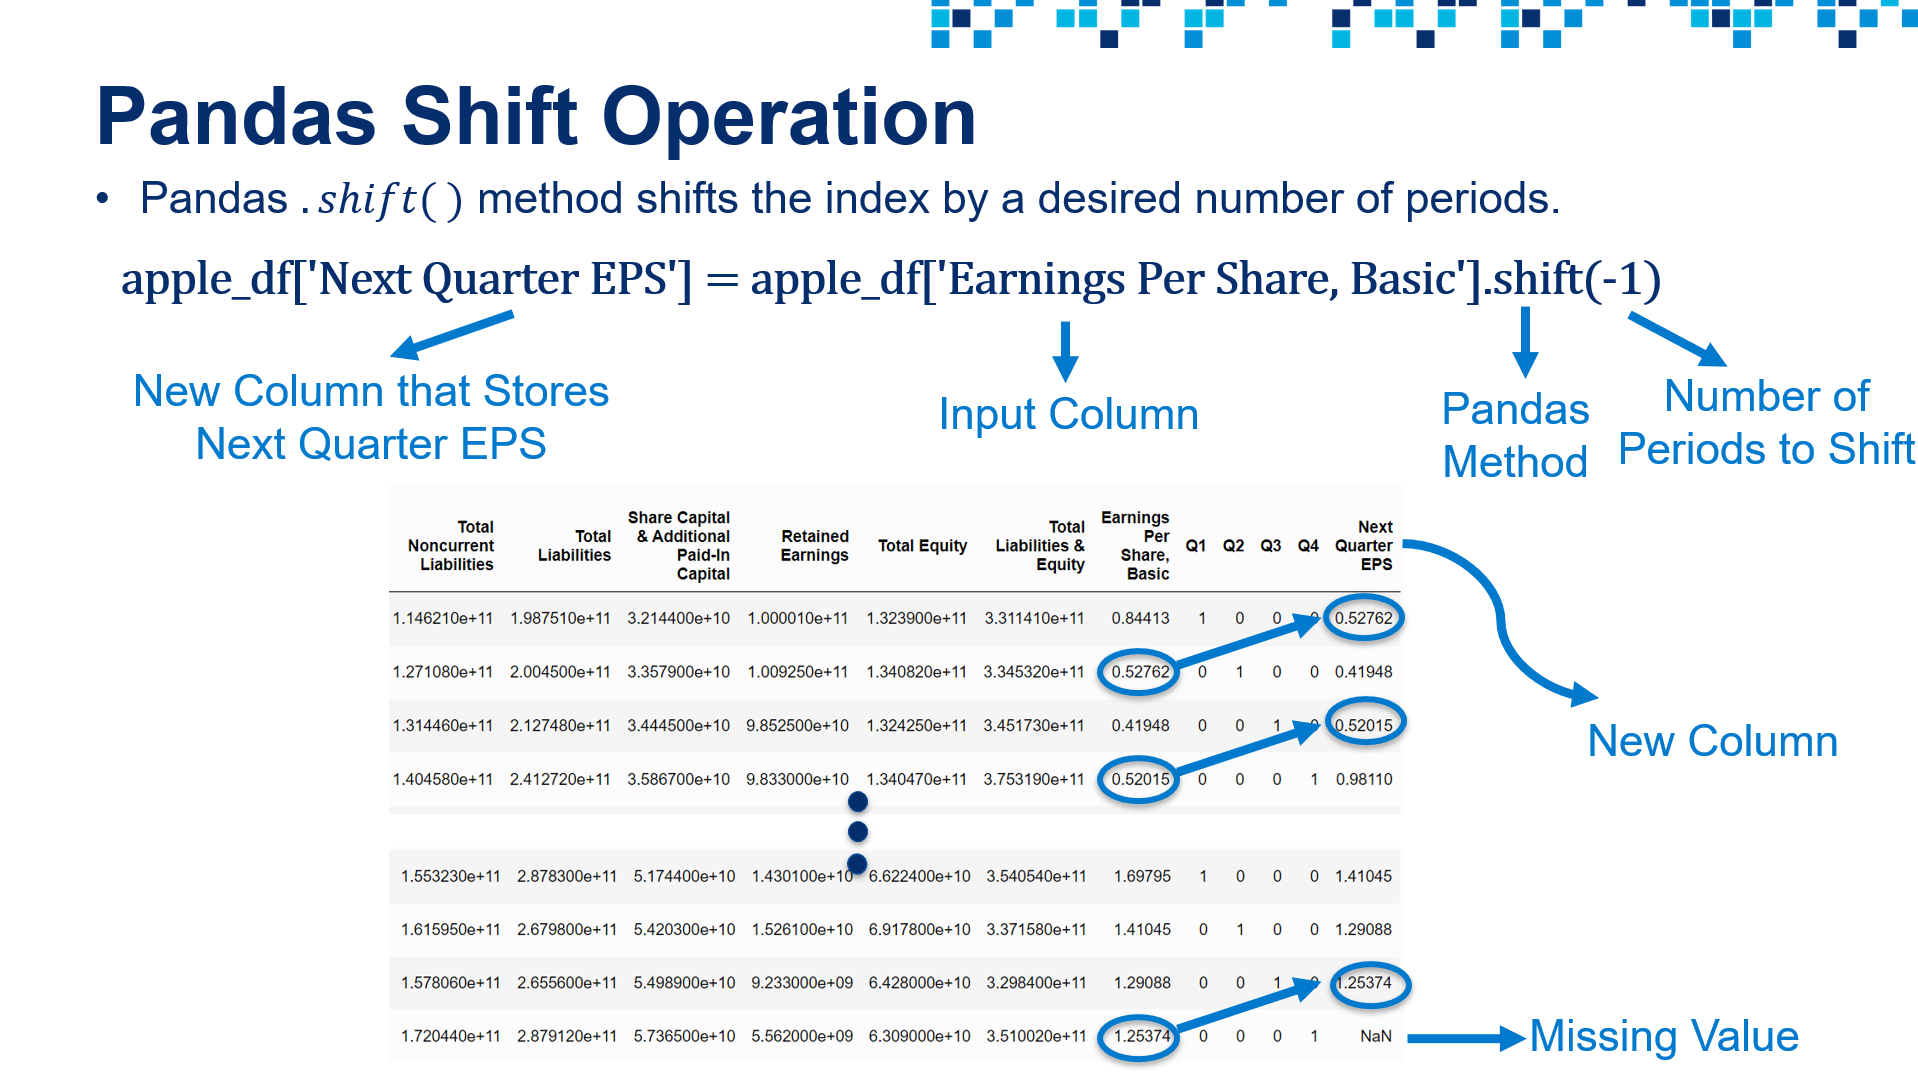

In [ ]:
# Let's create the target (output) label that the Machine Learning model will be trained to predict
# Let's shift the 'Earnings Per Share, Basic' column by one sample and place the results in a new column 
# The target label is the quarterly percentage change in EPS
apple_df['Next Quarter EPS'] = apple_df['Earnings Per Share, Basic'].shift(-1)
apple_df

In [ ]:
# Drop Null elements in Next Quarter EPS (last row)
apple_df = apple_df.dropna(subset = ['Next Quarter EPS']).reset_index(drop = True)
apple_df

In [ ]:
# Drop rows containing Null or missing values (first row)
apple_df = apple_df.dropna().reset_index(drop = True)
apple_df

In [ ]:
# The target label for the machine learning regression model is the quarterly percentage change in EPS

# Create a function that calculates the change in next quarter's EPS
def create_regression_label(next_quarter, current_quarter):
    
    # If the current quarter EPS value is zero, we set the label to zero 
    # Calculating the % change would result in an infinite number
    if abs(current_quarter) == 0:
        return 0
    return (next_quarter - current_quarter) / abs(current_quarter)

apple_df['% Quarterly Change in EPS (Regression Label)'] =\
apple_df.apply(lambda row: create_regression_label(row['Next Quarter EPS'], row['Earnings Per Share, Basic']), axis = 1)

apple_df

**PRACTICE OPPORTUNITY:** 
- **Write a Python code that creates a new feature to capture the quarterly percentage change in the "Total Assets" column. Place the output in a new column titled "Total Assets change from last quarter".**

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:**
- **Load the annual cashflow statements for US companies using SimFin and store them in cashflow_annual_df Pandas DataFrame**
- **What is the memory usage of the cashflow_annual_df Pandas DataFrame?**

In [ ]:
# Let's load annual cashflow statements for US companies
cashflow_annual_df = sf.load_cashflow(variant = 'annual', market = 'us').reset_index()
cashflow_annual_df

In [ ]:
# Use the info method to show Pandas DataFrame information
cashflow_annual_df.info()

**PRACTICE OPPORTUNITY SOLUTION:**
- **Using Pandas, load U.S. companies information contained in the "companies_information.csv" file and store it in a Pandas DataFrame titled "companies_info_df"**
- **Use the head() method to display the first 15 rows in the "companies_info_df" Pandas DataFrame**
- **What is the ticker symbol and SimFinId for APPLE INC?**

In [ ]:
# Let's use Pandas to read the CSV file that contains companies information 
companies_info_df = pd.read_csv('companies_information.csv')
companies_info_df

In [ ]:
# Apple SimFinID is 111052
companies_info_df.head(15)

In [ ]:
# You can read APPLE INC information directly from the Pandas DataFrame 
# Alternatively, you can filter out the Pandas DataFrame as follows
companies_info_df[ companies_info_df['Company Name'] == 'APPLE INC' ] 

**PRACTICE OPPORTUNITY SOLUTION:**
- **Display the first 70 rows in "industries_info_df" and "companies_info_df" Pandas DataFrames**
- **Merge the "industries_info_df" and "companies_info_df" Pandas DataFrames using "right" join type instead of "left" and place the answer in a new Pandas DataFrame titled "companies_industries_right_df"**

In [ ]:
industries_info_df.head(70)

In [ ]:
companies_info_df.head(70)

In [ ]:
# Let's merge industries and companies information using the right join
companies_industries_right_df = pd.merge(companies_info_df, industries_info_df, on = 'IndustryId', how = 'right')
companies_industries_right_df.head(70)

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Write a Python code that performs the following tasks:**
    - **Filter rows in "merged_df" Pandas DataFrame to only include Amazon data with Ticker Symbol 'AMZN'. Place the output in a Pandas DataFrame titled "amazon_df"**
    - **Count the number of missing values in every column in "amazon_df" Pandas DataFrame**
    - **Calculate the percentage of missing values in every column in "amazon_df" Pandas DataFrame**
    - **Handle missing values in "amazon_df" Pandas DataFrame by dropping columns containing more than 50% of Null values** 
    - **Replace missing values with the median column value if missing values represent less than 50% of a given column** 
    - **Perform a sanity check to ensure that all missing values have been properly handled**

In [ ]:
amazon_df = merged_df[merged_df['Ticker'] == 'AMZN'].reset_index(drop = True)
amazon_df

In [ ]:
# Let's sum up all missing values
amazon_df.isnull().sum()

In [ ]:
# Let's calculate the percentage of missing values in each column
percentage_missing  = amazon_df.isnull().sum() * 100 / len(amazon_df)
percentage_missing_df = pd.DataFrame({'% Missing': percentage_missing}).reset_index()
percentage_missing_df

In [ ]:
# Let's create a list of columns that contain a large number of missing values above 50% for example
columns_to_drop = percentage_missing_df[ percentage_missing_df['% Missing'] > 50 ]['index'].tolist()
columns_to_drop

In [ ]:
# Let's drop features (columns) that have more than 50% missing values
amazon_df = amazon_df.drop(columns = columns_to_drop)
amazon_df

In [ ]:
# Let's check if we still have any missing values
amazon_df.isnull().sum()

In [ ]:
# You can use fillna() to fill a given column with a certain value
amazon_df['Change in Accounts Receivable'].fillna(amazon_df['Change in Accounts Receivable'].median(), inplace = True)
amazon_df['Change in Inventories'].fillna(amazon_df['Change in Inventories'].median(), inplace = True)
amazon_df['Change in Accounts Payable'].fillna(amazon_df['Change in Accounts Payable'].median(), inplace = True)
amazon_df['Change in Other'].fillna(amazon_df['Change in Other'].median(), inplace = True)

In [ ]:
# Let's check if we still have any missing values
amazon_df.isnull().sum()

**PRACTICE OPPORTUNITY SOLUTION:**
- **Write a Python code that performs the following tasks:**
    - **Filter rows in "merged_df" Pandas DataFrame to only include Amazon data with Ticker Symbol 'AMZN'. Place the output in a Pandas DataFrame titled "amazon_df"**
    - **Perform one-hot encoding to the "Fiscal Period" column in the "amazon_df" using Pandas pd.get_dummies()**

In [ ]:
amazon_df = merged_df[merged_df['Ticker'] == 'AMZN'].reset_index(drop = True)
amazon_df

In [ ]:
# Let's calculate the one-hot encoded version of the "Fiscal Period" column
amazon_fiscal_encoded = pd.get_dummies(amazon_df['Fiscal Period'])
amazon_fiscal_encoded

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Write a Python code that creates a new feature to capture the quarterly percentage change in the "Total Assets" column. Place the output in a new column titled "Total Assets change from last quarter".**

In [ ]:
# Let's perform feature engineering by creating a new feature that can capture the % quarterly change in Total Assets
# pct_change() calculates the change is percentage from last quarter to current quarter

apple_df['Total Assets change from last quarter'] = apple_df['Total Assets'].pct_change()
apple_df

# EXCELLENT JOB!